### Import Libraries and Data Files

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [5]:
# Define the folder paths
folder_path_1 = 'foiText Files'
folder_path_2 = 'device Files'

# List all the text files in each folder
text_files_1 = ['foitext2020.txt','foitext2021.txt','foitext2022.txt', 'foitext2023.txt']
text_files_2 = ['DEVICE2020.txt', 'DEVICE2021.txt','DEVICE2022.txt', 'DEVICE2023.txt']

In [6]:
# Function to read and concatenate text files from a given folder
def read_and_concatenate(folder_path, text_files):
    dataframes = []
    for file in text_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, delimiter='|', encoding='ISO-8859-1', on_bad_lines='skip')
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [7]:
foitext_files = read_and_concatenate(folder_path_1, text_files_1)

In [12]:
device_files = read_and_concatenate(folder_path_2, text_files_2)

C:\Users\chamo\AppData\Local\Temp\ipykernel_28356\934403342.py:6: DtypeWarning: Columns (0,1,2,3,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|', encoding='ISO-8859-1', on_bad_lines='skip')
C:\Users\chamo\AppData\Local\Temp\ipykernel_28356\934403342.py:6: DtypeWarning: Columns (0,1,2,3,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|', encoding='ISO-8859-1', on_bad_lines='skip')
C:\Users\chamo\AppData\Local\Temp\ipykernel_28356\934403342.py:6: DtypeWarning: Columns (0,1,2,3,4,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|', encoding='ISO-8859-1', on_bad_lines='skip')
C:\Users\chamo\AppData\Local\Temp\ipykernel_28356\934403342.py:6: DtypeWarning: Columns (0,1,2,3,4,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,

## Preprocess

In [15]:
device_files = device_files[device_files['MDR_REPORT_KEY'].apply(type) == int]
device_files = device_files.set_index('MDR_REPORT_KEY')

In [19]:
device_files.head()

DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG  \
MDR_REPORT_KEY                                                   
6298948                     NaN          NaN               NaN   
7982437                     NaN          NaN               NaN   
9537111                     NaN          NaN               NaN   
9537112                     NaN          NaN               NaN   
9537113                     NaN          NaN               NaN   

               DEVICE_SEQUENCE_NO DATE_RECEIVED               BRAND_NAME  \
MDR_REPORT_KEY                                                             
6298948                       1.0    2020/04/16                      NaN   
7982437                       1.0    2020/07/10           NITINOL STAPLE   
9537111                       1.0    2020/01/01  SIMPLY LEGACY 2 IMPLANT   
9537112                       1.0    2020/01/01                 STERLING   
9537113                       1.0    2020/01/01                  MUSTANG   

                                 GENERIC_NAME  \
MDR_REPORT_KEY                                  
6298948          DIAGNOSTIC ULTRASOUND DEVICE   
7982437                        NITINOL STAPLE   
9537111                        DENTAL IMPLANT   
9537112                CATHETER, PERCUTANEOUS   
9537113         CATHETER, BILIARY, DIAGNOSTIC   

                                    MANUFACTURER_D_NAME  \
MDR_REPORT_KEY                                            
6298948                                             NaN   
7982437                                    TRIMED, INC.   
9537111         IMPLANT DIRECT SYBRON MANUFACTURING LLC   
9537112                   BOSTON SCIENTIFIC CORPORATION   
9537113                   BOSTON SCIENTIFIC CORPORATION   

                 MANUFACTURER_D_ADDRESS_1 MANUFACTURER_D_ADDRESS_2  ...  \
MDR_REPORT_KEY                                                      ...   
6298948                               NaN                      NaN  ...   
7982437              27533 AVENUE HOPKINS                      NaN  ...   
9537111         3050 EAST HILLCREST DRIVE                      NaN  ...   
9537112                  TWO SCIMED PLACE                      NaN  ...   
9537113                  TWO SCIMED PLACE                      NaN  ...   

                LOT_NUMBER OTHER_ID_NUMBER DEVICE_AVAILABILITY  \
MDR_REPORT_KEY                                                   
6298948                NaN             NaN                   *   
7982437             317003             NaN                   N   
9537111             144577             NaN                   Y   
9537112         0022221239             NaN                   N   
9537113         0023246409             NaN                   R   

               DATE_RETURNED_TO_MANUFACTURER DEVICE_REPORT_PRODUCT_CODE  \
MDR_REPORT_KEY                                                            
6298948                                  NaN                        IYN   
7982437                                  NaN                        JDR   
9537111                                  NaN                        DZE   
9537112                                  NaN                        DQY   
9537113                           2020/02/05                        FGE   

               DEVICE_AGE_TEXT DEVICE_EVALUATED_BY_MANUFACTUR  \
MDR_REPORT_KEY                                                  
6298948                    NaN                              *   
7982437                    NaN                              R   
9537111                    NaN                              N   
9537112                     DA                            NaN   
9537113                     DA                            NaN   

               COMBINATION_PRODUCT_FLAG          UDI-DI      UDI-PUBLIC  
MDR_REPORT_KEY                                                           
6298948                               N             NaN             NaN  
7982437                               N  00842188108952  00842188108

## Joining foiText and Device files



In [20]:
foitext_files = foitext_files.join(device_files, on = 'MDR_REPORT_KEY', how = 'left', rsuffix = '_device')

In [21]:
foitext_files.head(2)

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
0         9537171     173269159              N                        1   
1         9537171     173269160              D                        1   

   DATE_REPORT                                           FOI_TEXT  \
0          NaN  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...   
1          NaN  IT WAS REPORTED THAT THE PATIENT EXPIRED. THER...   

  DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  ...  \
0              NaN          NaN               NaN                1.0  ...   
1              NaN          NaN               NaN                1.0  ...   

  LOT_NUMBER OTHER_ID_NUMBER DEVICE_AVAILABILITY  \
0    2772732             NaN                   N   
1    2772732             NaN                   N   

  DATE_RETURNED_TO_MANUFACTURER DEVICE_REPORT_PRODUCT_CODE DEVICE_AGE_TEXT  \
0                           NaN                        LWS             NaN   
1                           NaN                        LWS             NaN   

  DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG          UDI-DI  \
0                              R                        N  05414734502085   
1                              R                        N  05414734502085   

       UDI-PUBLIC  
0  05414734502085  
1  05414734502085  

[2 rows x 36 columns]

In [22]:
foitext_files.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC'],
      dtype='object')

In [82]:
foitext_files[foitext_files.GENERIC_NAME == 'VENTRICULAR (ASSIST) BYPASS']

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  \
20285           13171020     283268925              N   
20286           13171020     283268926              D   
26189           13175939     283310749              N   
26190           13175939     283310750              D   
53794           13210241     283594387              N   
...                  ...           ...            ...   
11946230        18379719     343922369              N   
11946233        18360269     343922907              N   
11946239        18402371     343923941              N   
11946240        18335674     343925144              N   
11946241        17839095     343925191              N   

          PATIENT_SEQUENCE_NUMBER  DATE_REPORT  \
20285                           0          NaN   
20286                           0          NaN   
26189                           0          NaN   
26190                           0          NaN   
53794                           0          NaN   
...                           ...          ...   
11946230                        0          NaN   
11946233                        0          NaN   
11946239                        0          NaN   
11946240                        0          NaN   
11946241                        0          NaN   

                                                   FOI_TEXT DEVICE_EVENT_KEY  \
20285     NO FURTHER INFORMATION WAS PROVIDED. A SUPPLEM...              NaN   
20286     IT WAS REPORTED THAT THE PATIENT WAS EXPERIENC...              NaN   
26189     NO FURTHER INFORMATION WAS PROVIDED. A SUPPLEM...              NaN   
26190     IT WAS REPORTED THAT THE PATIENT HAD A PUMP EX...              NaN   
53794     NO FURTHER INFORMATION WAS PROVIDED. A SUPPLEM...              NaN   
...                                                     ...              ...   
11946230  SECTION D1 BRAND NAME: CORRECTED; SECTION D4 C...              NaN   
11946233  NO FURTHER INFORMATION WAS PROVIDED. THE MANUF...              NaN   
11946239  SECTION D1 BRAND NAME: CORRECTED; SECTION D4 C...              NaN   
11946240  SECTION D1, BRAND NAME: CORRECTED. SECTION D4,...              NaN   
11946241  MANUFACTURER'S INVESTIGATION CONCLUSION: THE R...              NaN   

         IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  ... LOT_NUMBER  \
20285             NaN               NaN                  1  ...        NaN   
20286             NaN               NaN                  1  ...        NaN   
26189             NaN               NaN                  1  ...    8129964   
26190             NaN               NaN                  1  ...    8129964   
53794             NaN               NaN                  1  ...    8049302   
...               ...               ...                ...  ...        ...   
11946230          NaN               NaN                  1  ...        NaN   
11946233          NaN               NaN                  1  ...    8102975   
11946239          NaN               NaN                  1  ...    8944148   
11946240          NaN               NaN                  1  ...        NaN   
11946241          NaN               NaN                  1  ...    8938443   

         OTHER_ID_NUMBER DEVICE_AVAILABILITY DATE_RETURNED_TO_MANUFACTURER  \
20285                NaN                   N                           NaN   
20286                NaN                   N                           NaN   
26189                NaN                   R                    2021/12/27   
26190                NaN                   R                    2021/12/27   
53794                NaN                   N                           NaN   
...                  ...                 ...                           ...   
11946230             NaN                   N                           NaN   
11946233             NaN                   N                           NaN   
11946239             NaN                   N                           NaN   
11946240             NaN                   R  

In [23]:
filter_values = [
    'VENTRICULAR (ASSIST) BYPASS',
    'VENTRICULAR (ASSISST) BYPASS',
    'VENTRICULAR ASSIST DEVICE',
    'LEFT VENTRICULAR ASSIST DEVICE'
]

In [24]:
filtered_foitext_files = foitext_files[foitext_files['GENERIC_NAME'].isin(filter_values)]

In [25]:
filtered_foitext_files

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  \
446              9537960     173289583              N   
447              9537960     173289584              D   
679              9538359     173306582              N   
680              9538359     173306583              D   
743              9538584     173316135              N   
...                  ...           ...            ...   
20810327        18379719     343922369              N   
20810330        18360269     343922907              N   
20810336        18402371     343923941              N   
20810337        18335674     343925144              N   
20810338        17839095     343925191              N   

          PATIENT_SEQUENCE_NUMBER  DATE_REPORT  \
446                             1          NaN   
447                             1          NaN   
679                             1          NaN   
680                             1          NaN   
743                             1          NaN   
...                           ...          ...   
20810327                        0          NaN   
20810330                        0          NaN   
20810336                        0          NaN   
20810337                        0          NaN   
20810338                        0          NaN   

                                                   FOI_TEXT DEVICE_EVENT_KEY  \
446       THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...              NaN   
447       IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...              NaN   
679       MANUFACTURER'S INVESTIGATION CONCLUSION: A DIR...              NaN   
680       IT WAS REPORTED THAT THE PATIENT EXPIRED DUE T...              NaN   
743       PATIENT INFORMATION NOT PROVIDED. DEVICE SERIA...              NaN   
...                                                     ...              ...   
20810327  SECTION D1 BRAND NAME: CORRECTED; SECTION D4 C...              NaN   
20810330  NO FURTHER INFORMATION WAS PROVIDED. THE MANUF...              NaN   
20810336  SECTION D1 BRAND NAME: CORRECTED; SECTION D4 C...              NaN   
20810337  SECTION D1, BRAND NAME: CORRECTED. SECTION D4,...              NaN   
20810338  MANUFACTURER'S INVESTIGATION CONCLUSION: THE R...              NaN   

         IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  ... LOT_NUMBER  \
446               NaN               NaN                1.0  ...        NaN   
447               NaN               NaN                1.0  ...        NaN   
679               NaN               NaN                1.0  ...    5835458   
680               NaN               NaN                1.0  ...    5835458   
743               NaN               NaN                1.0  ...        NaN   
...               ...               ...                ...  ...        ...   
20810327          NaN               NaN                  1  ...        NaN   
20810330          NaN               NaN                  1  ...    8102975   
20810336          NaN               NaN                  1  ...    8944148   
20810337          NaN               NaN                  1  ...        NaN   
20810338          NaN               NaN                  1  ...    8938443   

         OTHER_ID_NUMBER DEVICE_AVAILABILITY DATE_RETURNED_TO_MANUFACTURER  \
446                  NaN                   R                    2020/01/06   
447                  NaN                   R                    2020/01/06   
679                  NaN                   N                           NaN   
680                  NaN                   N                           NaN   
743                  NaN                   N                           NaN   
...                  ...                 ...                           ...   
20810327             NaN                   N                           NaN   
20810330             NaN                   N                           NaN   
20810336             NaN                   N                           NaN   
20810337             NaN                   R  

### Saving the Filtered File(DO NOT RUN AGAIN)

In [26]:
filtered_foitext_files.to_csv('filtered_foitext_files.csv', index=False)

## Start from Here

In [8]:
filtered_foitext_files = pd.read_csv('filtered_foitext_files.csv')

C:\Users\chamo\AppData\Local\Temp\ipykernel_8836\1072275716.py:1: DtypeWarning: Columns (15,18,21,35) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_foitext_files = pd.read_csv('filtered_foitext_files.csv')


In [27]:
filtered_foitext_files.head(2)

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
446         9537960     173289583              N                        1   
447         9537960     173289584              D                        1   

     DATE_REPORT                                           FOI_TEXT  \
446          NaN  THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...   
447          NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   

    DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  ...  \
446              NaN          NaN               NaN                1.0  ...   
447              NaN          NaN               NaN                1.0  ...   

    LOT_NUMBER OTHER_ID_NUMBER DEVICE_AVAILABILITY  \
446        NaN             NaN                   R   
447        NaN             NaN                   R   

    DATE_RETURNED_TO_MANUFACTURER DEVICE_REPORT_PRODUCT_CODE DEVICE_AGE_TEXT  \
446                    2020/01/06                        DSQ              DA   
447                    2020/01/06                        DSQ              DA   

    DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG          UDI-DI  \
446                            NaN                        N  00888707002639   
447                            NaN                        N  00888707002639   

         UDI-PUBLIC  
446  00888707002639  
447  00888707002639  

[2 rows x 36 columns]

## Pre-processing Data

In [9]:
filtered_foitext_files.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC'],
      dtype='object')

## Identify unique values

In [10]:
def unique_values_in_columns(df):
    unique_values = {}
    for column in df.columns:
        unique_vals = df[column].unique()
        if len(unique_vals) > 40:
            unique_values[column] = 'More than 40 unique values'
        else:
            unique_values[column] = unique_vals.tolist()
    return unique_values

In [11]:
# Example usage
unique_values = unique_values_in_columns(filtered_foitext_files)
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values}\n")

Column: MDR_REPORT_KEY
Unique Values: More than 40 unique values

Column: MDR_TEXT_KEY
Unique Values: More than 40 unique values

Column: TEXT_TYPE_CODE
Unique Values: ['N', 'D']

Column: PATIENT_SEQUENCE_NUMBER
Unique Values: [1, 0]

Column: DATE_REPORT
Unique Values: [nan]

Column: FOI_TEXT
Unique Values: More than 40 unique values

Column: DEVICE_EVENT_KEY
Unique Values: [nan]

Column: IMPLANT_FLAG
Unique Values: [nan]

Column: DATE_REMOVED_FLAG
Unique Values: [nan]

Column: DEVICE_SEQUENCE_NO
Unique Values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]

Column: DATE_RECEIVED
Unique Values: More than 40 unique values

Column: BRAND_NAME
Unique Values: More than 40 unique values

Column: GENERIC_NAME
Unique Values: ['VENTRICULAR (ASSIST) BYPASS', 'VENTRICULAR (ASSISST) BYPASS', 'VENTRICULAR ASSIST DEVICE', 'LEFT VENTRICULAR ASSIST DEVICE']

Column: MANUFACTURER_D_NAME
Unique Values: More than 40 unique values

Column: MANUFACTURER_D_ADDRESS_1
Unique Values: ['14400 NW 60T

In [12]:
filtered_foitext_files["FOI_TEXT"].str.contains("PAIN|INFECTION|SICK|BLEEDING|EROSION|SEVERE|DEMAGE|TIGHT|HEALTH PROBLEM|ABNORMAL|ANXIETY|NEGATIVE|DIFFICULT|ACHES|PAINFUL|DIARRHEA|BOWEL OBSTRUCTION|INCONTINENCE|DIED|BOWEL PROBLEMS|ANAL|DYSPAREUNIA|PAINfUL SEXUAL INTERCOURSE|REMOVAL|COME OUT|WEAKNESS|NUMBNESS").value_counts()


FOI_TEXT
False    83354
True     60821
Name: count, dtype: int64

## Reading Main Data File

In [27]:
mdrfoiMaster = pd.read_csv(
    'mdrfoiThru2023.txt', 
    sep='|', 
    quoting=3, 
    encoding = "ISO-8859-1", 
    on_bad_lines='skip', 
    low_memory=False, 
    usecols=["MDR_REPORT_KEY", "REPORT_SOURCE_CODE",
             "DATE_RECEIVED", "ADVERSE_EVENT_FLAG",
             "PRODUCT_PROBLEM_FLAG", 
             "SUMMARY_REPORT", "EVENT_TYPE"])

In [29]:
mdrfoiMaster.to_csv('mdrfoiMaster_exported.csv', index=False)

## READ MDRFOIMASTER

In [31]:
mdrfoiMaster = pd.read_csv('mdrfoiMaster_exported.csv')

C:\Users\chamo\AppData\Local\Temp\ipykernel_28356\2369801807.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  mdrfoiMaster = pd.read_csv('mdrfoiMaster_exported.csv')


In [35]:
mdrfoiMaster

MDR_REPORT_KEY REPORT_SOURCE_CODE DATE_RECEIVED ADVERSE_EVENT_FLAG  \
0                     10                  U    03/10/1992                  Y   
1                     11                  U    03/10/1992                  N   
2                     12                  U    03/10/1992                  Y   
3                     13                  U    03/10/1992                  Y   
4                     14                  U    03/10/1992                  Y   
...                  ...                ...           ...                ...   
18118154        18425771                  P    12/29/2023                  N   
18118155        18425981                  P    12/29/2023                  Y   
18118156        18426094                  P    12/29/2023                  Y   
18118157        18426168                  P    12/29/2023                  N   
18118158        18426179                  P    12/29/2023                  Y   

         PRODUCT_PROBLEM_FLAG EVENT_TYPE SUMMARY_REPORT  
0                           N         IN              N  
1                           Y          M              N  
2                           N         IN              N  
3                           N         IN              N  
4                           N          D              N  
...                       ...        ...            ...  
18118154                    Y          M              N  
18118155                    Y         IN              N  
18118156                    N         IN              N  
18118157                    N          O              N  
18118158                    N         IN              N  

[18116840 rows x 7 columns]

In [33]:
filtered_foitext_files.head(2)

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
446         9537960     173289583              N                        1   
447         9537960     173289584              D                        1   

     DATE_REPORT                                           FOI_TEXT  \
446          NaN  THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...   
447          NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   

    DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  ...  \
446              NaN          NaN               NaN                1.0  ...   
447              NaN          NaN               NaN                1.0  ...   

    LOT_NUMBER OTHER_ID_NUMBER DEVICE_AVAILABILITY  \
446        NaN             NaN                   R   
447        NaN             NaN                   R   

    DATE_RETURNED_TO_MANUFACTURER DEVICE_REPORT_PRODUCT_CODE DEVICE_AGE_TEXT  \
446                    2020/01/06                        DSQ              DA   
447                    2020/01/06                        DSQ              DA   

    DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG          UDI-DI  \
446                            NaN                        N  00888707002639   
447                            NaN                        N  00888707002639   

         UDI-PUBLIC  
446  00888707002639  
447  00888707002639  

[2 rows x 36 columns]

## Filter out non-numeric and apply INT - mdrfoiMaster

In [34]:
# Filter out non-numeric values from MDR_REPORT_KEY
mdrfoiMaster = mdrfoiMaster[pd.to_numeric(mdrfoiMaster['MDR_REPORT_KEY'], errors='coerce').notna()]

# Convert MDR_REPORT_KEY to int
mdrfoiMaster['MDR_REPORT_KEY'] = mdrfoiMaster['MDR_REPORT_KEY'].astype(int)

C:\Users\chamo\AppData\Local\Temp\ipykernel_28356\2761448113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdrfoiMaster['MDR_REPORT_KEY'] = mdrfoiMaster['MDR_REPORT_KEY'].astype(int)


In [36]:
merged_df = filtered_foitext_files.merge(mdrfoiMaster,
                                         on='MDR_REPORT_KEY',
                                         how='left',
                                         suffixes=('', '_master'))

In [37]:
merged_df.head(2)

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
0         9537960     173289583              N                        1   
1         9537960     173289584              D                        1   

   DATE_REPORT                                           FOI_TEXT  \
0          NaN  THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...   
1          NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   

  DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  ...  \
0              NaN          NaN               NaN                1.0  ...   
1              NaN          NaN               NaN                1.0  ...   

  DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG          UDI-DI  \
0                            NaN                        N  00888707002639   
1                            NaN                        N  00888707002639   

       UDI-PUBLIC REPORT_SOURCE_CODE DATE_RECEIVED_master ADVERSE_EVENT_FLAG  \
0  00888707002639                  M           01/02/2020                  Y   
1  00888707002639                  M           01/02/2020                  Y   

  PRODUCT_PROBLEM_FLAG EVENT_TYPE SUMMARY_REPORT  
0                    Y         IN              N  
1                    Y         IN              N  

[2 rows x 42 columns]

In [38]:
merged_df.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC',
       'REPORT_SOURCE_CODE', 'DATE_RECEIVED_master', 'ADVERSE_EVENT_FLAG',
       'PRODUCT_PROBLEM_FLAG', 'EVENT_T

------------------------------------------------------------------------------------------

In [39]:
merged_df.to_csv('merged_df_exported_v2.csv', index=False)

In [40]:
merged_df

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
0              9537960     173289583              N                        1   
1              9537960     173289584              D                        1   
2              9538359     173306582              N                        1   
3              9538359     173306583              D                        1   
4              9538584     173316135              N                        1   
...                ...           ...            ...                      ...   
144170        18379719     343922369              N                        0   
144171        18360269     343922907              N                        0   
144172        18402371     343923941              N                        0   
144173        18335674     343925144              N                        0   
144174        17839095     343925191              N                        0   

        DATE_REPORT                                           FOI_TEXT  \
0               NaN  THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...   
1               NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   
2               NaN  MANUFACTURER'S INVESTIGATION CONCLUSION: A DIR...   
3               NaN  IT WAS REPORTED THAT THE PATIENT EXPIRED DUE T...   
4               NaN  PATIENT INFORMATION NOT PROVIDED. DEVICE SERIA...   
...             ...                                                ...   
144170          NaN  SECTION D1 BRAND NAME: CORRECTED; SECTION D4 C...   
144171          NaN  NO FURTHER INFORMATION WAS PROVIDED. THE MANUF...   
144172          NaN  SECTION D1 BRAND NAME: CORRECTED; SECTION D4 C...   
144173          NaN  SECTION D1, BRAND NAME: CORRECTED. SECTION D4,...   
144174          NaN  MANUFACTURER'S INVESTIGATION CONCLUSION: THE R...   

       DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO  \
0                   NaN          NaN               NaN                1.0   
1                   NaN          NaN               NaN                1.0   
2                   NaN          NaN               NaN                1.0   
3                   NaN          NaN               NaN                1.0   
4                   NaN          NaN               NaN                1.0   
...                 ...          ...               ...                ...   
144170              NaN          NaN               NaN                  1   
144171              NaN          NaN               NaN                  1   
144172              NaN          NaN               NaN                  1   
144173              NaN          NaN               NaN                  1   
144174              NaN          NaN               NaN                  1   

        ... DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG  \
0       ...                            NaN                        N   
1       ...                            NaN                        N   
2       ...                              R                        N   
3       ...                              R                        N   
4       ...                            NaN                        N   
...     ...                            ...                      ...   
144170  ...                              R                        N   
144171  ...                              R                        N   
144172  ...                              R                        N   
144173  ...                              Y                        N   
144174  ...                              R                        N   

                UDI-DI      UDI-PUBLIC REPORT_SOURCE_CODE  \
0       00888707002639  00888707002639                  M   
1       00888707002639  00888707002639                  M   
2                  NaN             NaN                  M   
3                  NaN             NaN                  M   
4                  NaN             NaN                  M   
...           

## Start From HERE !!!

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [2]:
foiText_merged = pd.read_csv('merged_df_exported_v2.csv')

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\1390392835.py:1: DtypeWarning: Columns (15,18,21,35) have mixed types. Specify dtype option on import or set low_memory=False.
  foiText_merged = pd.read_csv('merged_df_exported_v2.csv')


In [3]:
foiText_merged.head(2)

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
0         9537960     173289583              N                        1   
1         9537960     173289584              D                        1   

   DATE_REPORT                                           FOI_TEXT  \
0          NaN  THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...   
1          NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   

   DEVICE_EVENT_KEY  IMPLANT_FLAG  DATE_REMOVED_FLAG  DEVICE_SEQUENCE_NO  ...  \
0               NaN           NaN                NaN                 1.0  ...   
1               NaN           NaN                NaN                 1.0  ...   

  DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG        UDI-DI  \
0                            NaN                        N  8.887070e+11   
1                            NaN                        N  8.887070e+11   

       UDI-PUBLIC REPORT_SOURCE_CODE DATE_RECEIVED_master ADVERSE_EVENT_FLAG  \
0  00888707002639                  M           01/02/2020                  Y   
1  00888707002639                  M           01/02/2020                  Y   

  PRODUCT_PROBLEM_FLAG EVENT_TYPE  SUMMARY_REPORT  
0                    Y         IN               N  
1                    Y         IN               N  

[2 rows x 42 columns]

In [4]:
foiText_merged.head(2)

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
0         9537960     173289583              N                        1   
1         9537960     173289584              D                        1   

   DATE_REPORT                                           FOI_TEXT  \
0          NaN  THIS DEVICE IS USED FOR TREATMENT NOT DIAGNOSI...   
1          NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   

   DEVICE_EVENT_KEY  IMPLANT_FLAG  DATE_REMOVED_FLAG  DEVICE_SEQUENCE_NO  ...  \
0               NaN           NaN                NaN                 1.0  ...   
1               NaN           NaN                NaN                 1.0  ...   

  DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG        UDI-DI  \
0                            NaN                        N  8.887070e+11   
1                            NaN                        N  8.887070e+11   

       UDI-PUBLIC REPORT_SOURCE_CODE DATE_RECEIVED_master ADVERSE_EVENT_FLAG  \
0  00888707002639                  M           01/02/2020                  Y   
1  00888707002639                  M           01/02/2020                  Y   

  PRODUCT_PROBLEM_FLAG EVENT_TYPE  SUMMARY_REPORT  
0                    Y         IN               N  
1                    Y         IN               N  

[2 rows x 42 columns]

## Date adjustment

In [5]:
foiText_merged["DATE_RECEIVED"] = pd.to_datetime(foiText_merged["DATE_RECEIVED"])

## Identify Adverse Events (Flag-Y) and TEXT_TYPE_CODE (D)

In [6]:
adverseEvents_full = foiText_merged[(foiText_merged["ADVERSE_EVENT_FLAG"] == "Y") & (foiText_merged["TEXT_TYPE_CODE"] == "D")]

In [7]:
adverseEvents_full.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC',
       'REPORT_SOURCE_CODE', 'DATE_RECEIVED_master', 'ADVERSE_EVENT_FLAG',
       'PRODUCT_PROBLEM_FLAG', 'EVENT_T

In [8]:
# Remove duplicates based on 'FOI_TEXT'
adverseEvents = adverseEvents_full.drop_duplicates(subset='FOI_TEXT')

In [9]:
adverseEvents

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
1              9537960     173289584              D                        1   
3              9538359     173306583              D                        1   
5              9538584     173316136              D                        1   
9              9538557     173320473              D                        1   
11             9538656     173322053              D                        1   
...                ...           ...            ...                      ...   
143618        18259928     342869627              D                        0   
143621        17290594     342981882              D                        0   
143666        17906710     343226133              D                        0   
143927        17107510     343561589              D                        0   
144028        17837351     343664025              D                        0   

        DATE_REPORT                                           FOI_TEXT  \
1               NaN  IT WAS REPORTED THAT THE PATIENT HAD HEMOLYSIS...   
3               NaN  IT WAS REPORTED THAT THE PATIENT EXPIRED DUE T...   
5               NaN  THE SITE REPORTED THE PATIENT EXPIRED ON (B)(6...   
9               NaN  IT WAS REPORTED THE PATIENT HAD LOW FLOW ALARM...   
11              NaN  IT WAS REPORTED THE PATIENT EXPIRED. THE PATIE...   
...             ...                                                ...   
143618          NaN  IT WAS ADDITIONALLY REPORTED THAT THE PATIENT ...   
143621          NaN  IT WAS FURTHER REPORTED THAT THE PATIENT WAS E...   
143666          NaN  ADDITIONAL INFORMATION REPORTED THAT THE TRANS...   
143927          NaN  IT WAS FURTHER REPORTED THAT A TRANSTHORACIC E...   
144028          NaN  IT WAS FURTHER REPORTED THAT THE PATIENT HAD R...   

        DEVICE_EVENT_KEY  IMPLANT_FLAG  DATE_REMOVED_FLAG  DEVICE_SEQUENCE_NO  \
1                    NaN           NaN                NaN                 1.0   
3                    NaN           NaN                NaN                 1.0   
5                    NaN           NaN                NaN                 1.0   
9                    NaN           NaN                NaN                 1.0   
11                   NaN           NaN                NaN                 1.0   
...                  ...           ...                ...                 ...   
143618               NaN           NaN                NaN                 1.0   
143621               NaN           NaN                NaN                 1.0   
143666               NaN           NaN                NaN                 1.0   
143927               NaN           NaN                NaN                 1.0   
144028               NaN           NaN                NaN                 1.0   

        ... DEVICE_EVALUATED_BY_MANUFACTUR COMBINATION_PRODUCT_FLAG  \
1       ...                            NaN                        N   
3       ...                              R                        N   
5       ...                            NaN                        N   
9       ...                            NaN                        N   
11      ...                              R                        N   
...     ...                            ...                      ...   
143618  ...                              R                        N   
143621  ...                              *                        N   
143666  ...                              R                        N   
143927  ...                              *                        N   
144028  ...                              *                        N   

              UDI-DI                                  UDI-PUBLIC  \
1       8.887070e+11                              00888707002639   
3                NaN                                         NaN   
5                NaN                                         NaN   
9       8.130240e+11                              0081302401

In [10]:
adverseEvents["Year"]  = (adverseEvents["DATE_RECEIVED"]).dt.year

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\1210113624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adverseEvents["Year"]  = (adverseEvents["DATE_RECEIVED"]).dt.year


In [11]:
yearly_counts = adverseEvents.groupby("Year")["ADVERSE_EVENT_FLAG"].count().reset_index(name='Counts')

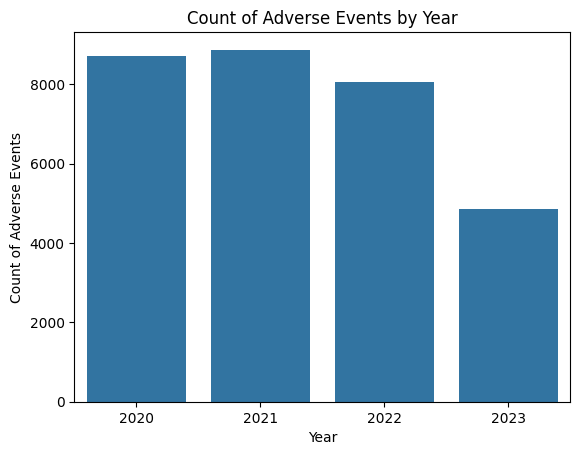

In [12]:
# Plotting
sns.barplot(x='Year', y='Counts', data=yearly_counts)
plt.title('Count of Adverse Events by Year')
plt.xlabel('Year')
plt.ylabel('Count of Adverse Events')
plt.show()

## Further Visualisations

In [13]:
# Define subcategories of keywords
subcategories = {
    "Pain and Discomfort": ["pain", "tight", "weakness", "numbness"],
    "Bleeding and Circulation": ["bleeding", "bleed", "bled"],
    "Fatigue and Weakness": ["fatigue", "dizziness", "weakness"],
    "Infections": ["infection", "septicemia", "sepsis", "viral infection", "bacterial"],
    "Cardiac Conditions": ["cardiac tamponade", "myocardial infarction", "cardiogenic shock", "heart failure", "pump failure"],
    "Circulatory and Blood Conditions": ["low cardiac output", "thrombosis", "stroke", "pericardial effusion", "ventricular arrhythmias"],
    "Mechanical Failures": ["malfunction", "device dislocation", "device wear and tear", "motor failure", "sensor malfunction", "fluid leakage", "low flow alarms","battery failure", "electrical failure", "improper implantation", "device adjustment", "calibration error", "programming error"],
    "Psychological Issues": ["distress", "psychological", "cognitive impairment"],
    "Surgical Complications": ["surgical site infection", "graft failure", "reoperation", "postoperative complications"],
    "Systemic Outcomes": ["hemolysis", "anticoagulation dysfunction", "readmission", "device-related mortality"],
    "Fatal Outcomes": ["death", "died", "expired", "passed away"],
    "Digestive System Issues": ["diarrhea", "bowel obstruction", "incontinence", "bowel problems", "abdominal pain", "constipation"],
    "Respiratory Health": ["shortness of breath", "respiratory arrest", "respiratory failure"]
}

## Don't run again ( Only if want to save the subcategories again )

In [14]:
# Create a DataFrame
data = {"Category": [], "Keywords": []}
for category, keywords in subcategories.items():
    data["Category"].append(category)
    # Join keywords into a string with each keyword in single quotes
    data["Keywords"].append(", ".join(f"'{keyword}'" for keyword in keywords))

df = pd.DataFrame(data)

# Export the DataFrame to a CSV file
df.to_csv('Subcategories_and_Keywords.csv', index=False)

## Visualise Subcategories

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\3763050371.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adverseEvents['FOI_TEXT'].fillna('', inplace=True)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\3763050371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adverseEvents['FOI_TEXT'].fillna('', inplace=True)
C:\Users\chamo\Ap

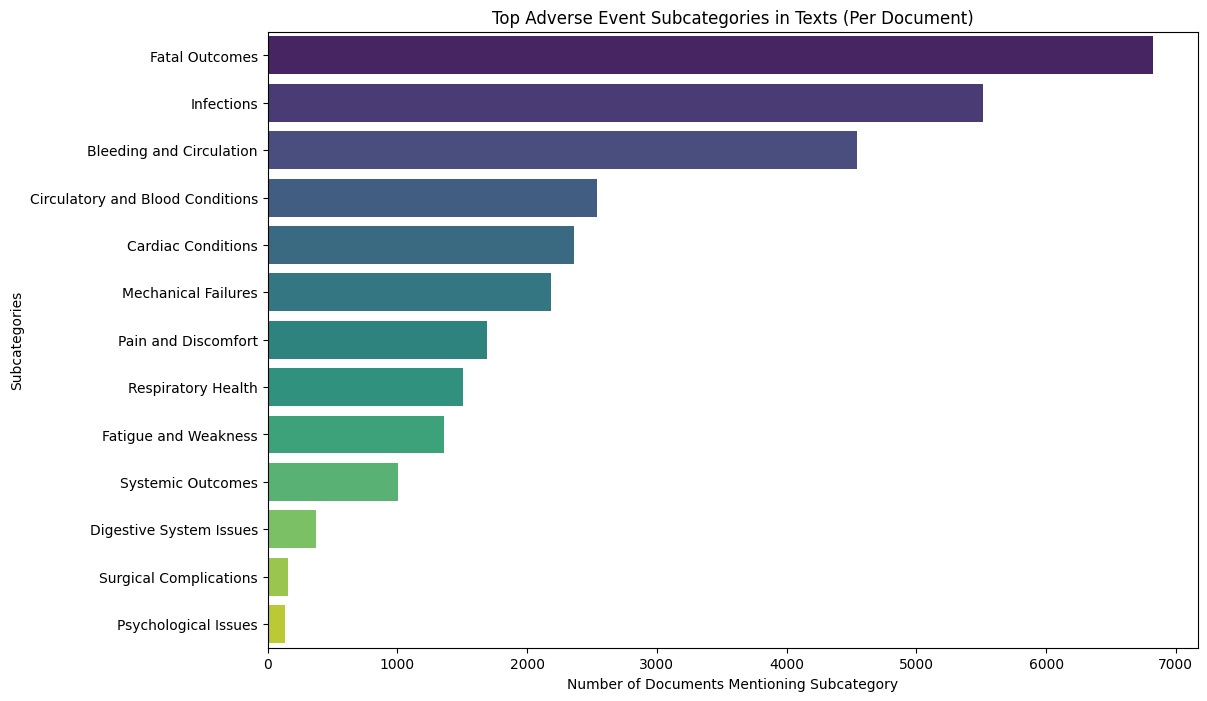

In [14]:
# Ensure FOI_TEXT is a string and handle any NaN values
adverseEvents['FOI_TEXT'].fillna('', inplace=True)

# Initialize a DataFrame to store counts per subcategory per document
subcategory_counts = pd.DataFrame()

# Iterate over subcategories and keywords
for subcategory_name, keywords in subcategories.items():
    subcategory_pattern = r'\b(' + '|'.join([re.escape(keyword) for keyword in keywords]) + r')\b'
    subcategory_counts[subcategory_name] = adverseEvents['FOI_TEXT'].str.contains(subcategory_pattern, case=False, na=False)

# Aggregate these boolean counts to get the number of documents mentioning each subcategory
subcategory_counts_sum = subcategory_counts.sum().reset_index()
subcategory_counts_sum.columns = ['Subcategory', 'Count']
subcategory_counts_sum = subcategory_counts_sum.sort_values(by='Count', ascending=False)

# Now visualize the top subcategories
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Subcategory', data=subcategory_counts_sum, palette='viridis')
plt.title('Top Adverse Event Subcategories in Texts (Per Document)')
plt.xlabel('Number of Documents Mentioning Subcategory')
plt.ylabel('Subcategories')
plt.show()

In [15]:
# Ensure FOI_TEXT is a string and handle any NaN values
adverseEvents['FOI_TEXT'].fillna('', inplace=True)

# Initialize a DataFrame to store counts of each keyword
keyword_counts = pd.DataFrame(index=adverseEvents.index)

# Count each keyword's occurrences in each document and sum them by subcategory
for subcategory_name, keywords in subcategories.items():
    keyword_pattern = r'\b(' + '|'.join([re.escape(keyword) for keyword in keywords]) + r')\b'
    keyword_counts[subcategory_name] = adverseEvents['FOI_TEXT'].str.count(keyword_pattern, flags=re.IGNORECASE)

# Aggregate these counts to get the total mentions of each subcategory
subcategory_totals = keyword_counts.sum()

# Count the number of documents that mention each subcategory
document_mentions = (keyword_counts > 0).sum()

# Prepare the final DataFrame
final_counts = pd.DataFrame({
    'Adverse Events': subcategory_totals.index,
    'No. of Reports': document_mentions.values,
    'Freq': subcategory_totals.values,
    'Report (%)': (document_mentions / len(adverseEvents) * 100).values
}).sort_values(by='Report (%)', ascending=False)

# Display the DataFrame
print(final_counts)

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\1860318487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adverseEvents['FOI_TEXT'].fillna('', inplace=True)


                      Adverse Events  No. of Reports  Freq  Report (%)
10                    Fatal Outcomes            6826  9620   22.387668
3                         Infections            5513  8777   18.081338
1           Bleeding and Circulation            4545  6994   14.906527
5   Circulatory and Blood Conditions            2537  3477    8.320761
4                 Cardiac Conditions            2360  2970    7.740243
6                Mechanical Failures            2186  2922    7.169564
0                Pain and Discomfort            1688  2095    5.536241
12                Respiratory Health            1509  1674    4.949164
2               Fatigue and Weakness            1360  1615    4.460479
9                  Systemic Outcomes            1009  1151    3.309282
11           Digestive System Issues             375   444    1.229911
8             Surgical Complications             156   164    0.511643
7               Psychological Issues             132   139    0.432929


## By Year Visualisation

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\521347053.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\521347053.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\521347053.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\521347053.py:11: UserWa

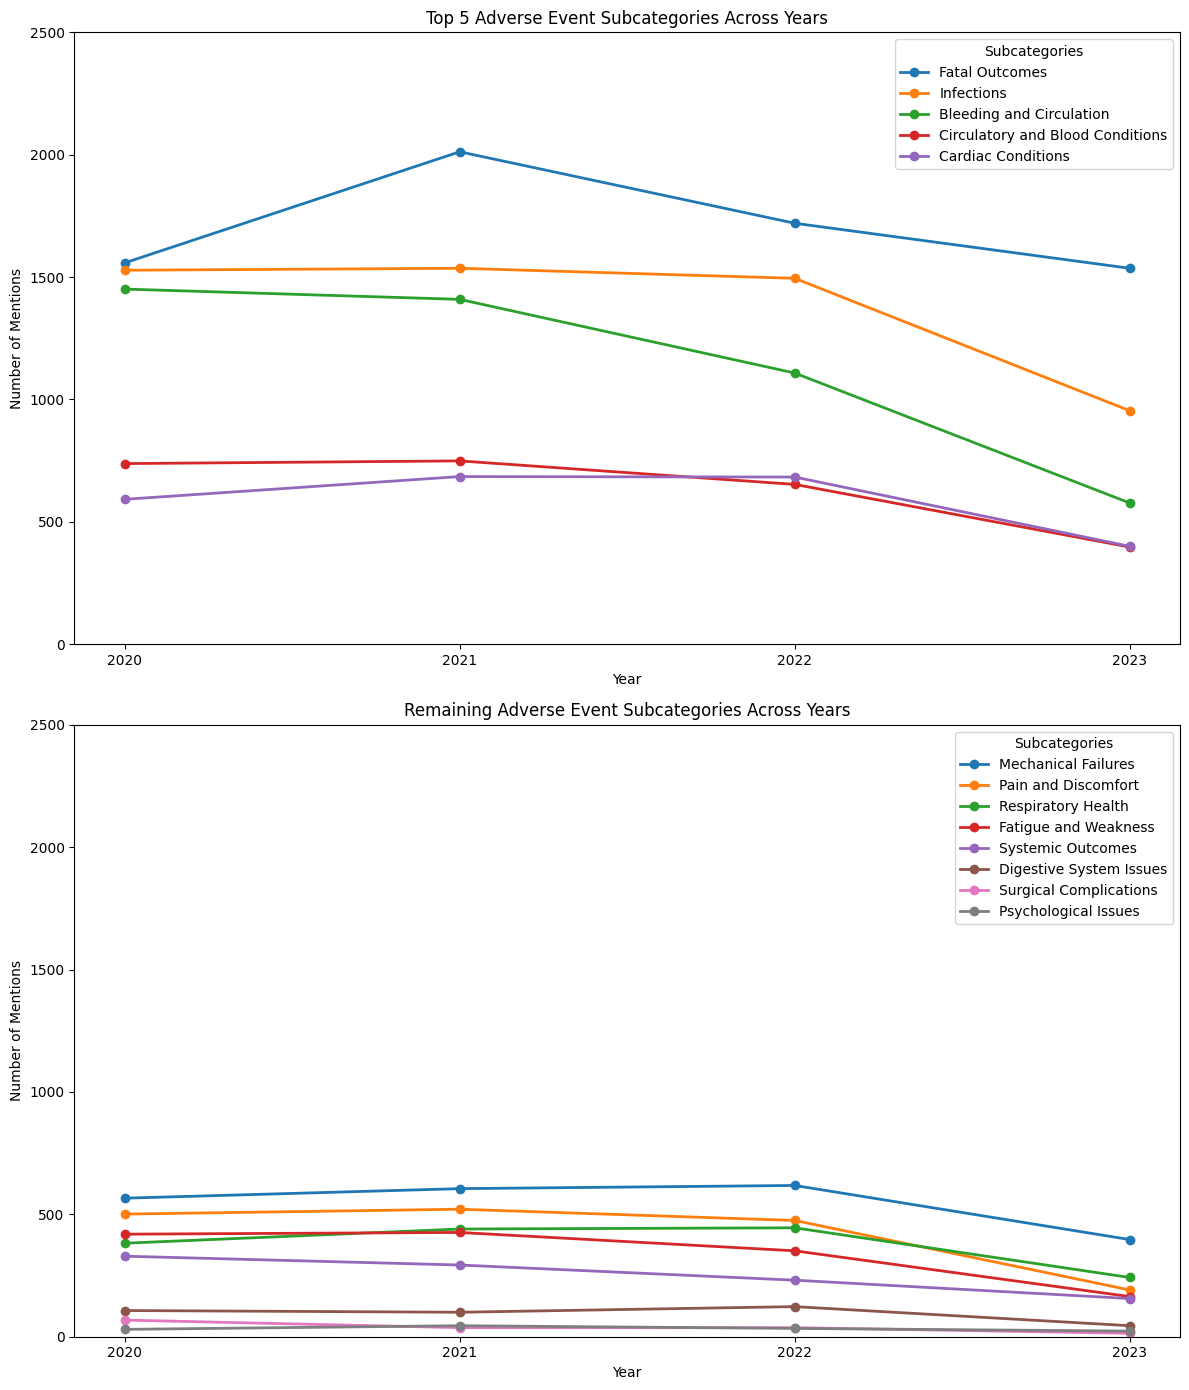

In [16]:
# Ensure adverseEvents is a standalone DataFrame
adverseEvents = adverseEvents.copy()

# Initialize the DataFrame to store subcategory trends
subcategory_trends = pd.DataFrame()

# Process each subcategory
for subcategory, keywords in subcategories.items():
    # Create a pattern that matches any of the keywords in the subcategory
    pattern = r'\b(' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'
    adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
    # Group by 'Year' and sum the 'subcategory_match' column to count occurrences
    subcategory_counts = adverseEvents.groupby('Year')['subcategory_match'].sum()
    subcategory_trends[subcategory] = subcategory_counts

# Transpose to align years for plotting
subcategory_trends = subcategory_trends.transpose()

# Calculate total mentions for each subcategory and get the top ones
subcategory_sums = subcategory_trends.sum(axis=1)
top_subcategories = subcategory_sums.sort_values(ascending=False)

# Split into top 5 and the rest
top_5_subcategories = top_subcategories.head(5).index
bottom_subcategories = top_subcategories.tail(len(top_subcategories) - 5).index

# Data for plotting
top_5_data = subcategory_trends.loc[top_5_subcategories]
bottom_data = subcategory_trends.loc[bottom_subcategories]

# Plot data function with subplots
def plot_data():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))  # Set up 2 rows, 1 column

    # Plot the top 5 subcategories
    for subcategory in top_5_data.index:
        ax1.plot(top_5_data.columns, top_5_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax1.set_title('Top 5 Adverse Event Subcategories Across Years')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Mentions')
    ax1.legend(title="Subcategories", loc='upper right')
    ax1.set_xticks(top_5_data.columns)
    ax1.set_ylim(0, 2500)  # Set y-axis limit

    # Plot the remaining subcategories
    for subcategory in bottom_data.index:
        ax2.plot(bottom_data.columns, bottom_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax2.set_title('Remaining Adverse Event Subcategories Across Years')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Mentions')
    ax2.legend(title="Subcategories", loc='upper right')
    ax2.set_xticks(bottom_data.columns)
    ax2.set_ylim(0, 2500)  # Set y-axis limit

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_data()

# Clean up the temporary column
adverseEvents.drop('subcategory_match', axis=1, inplace=True)


C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\74256348.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adverseEvents['FOI_TEXT'].fillna('', inplace=True)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\74256348.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\74256348.py:

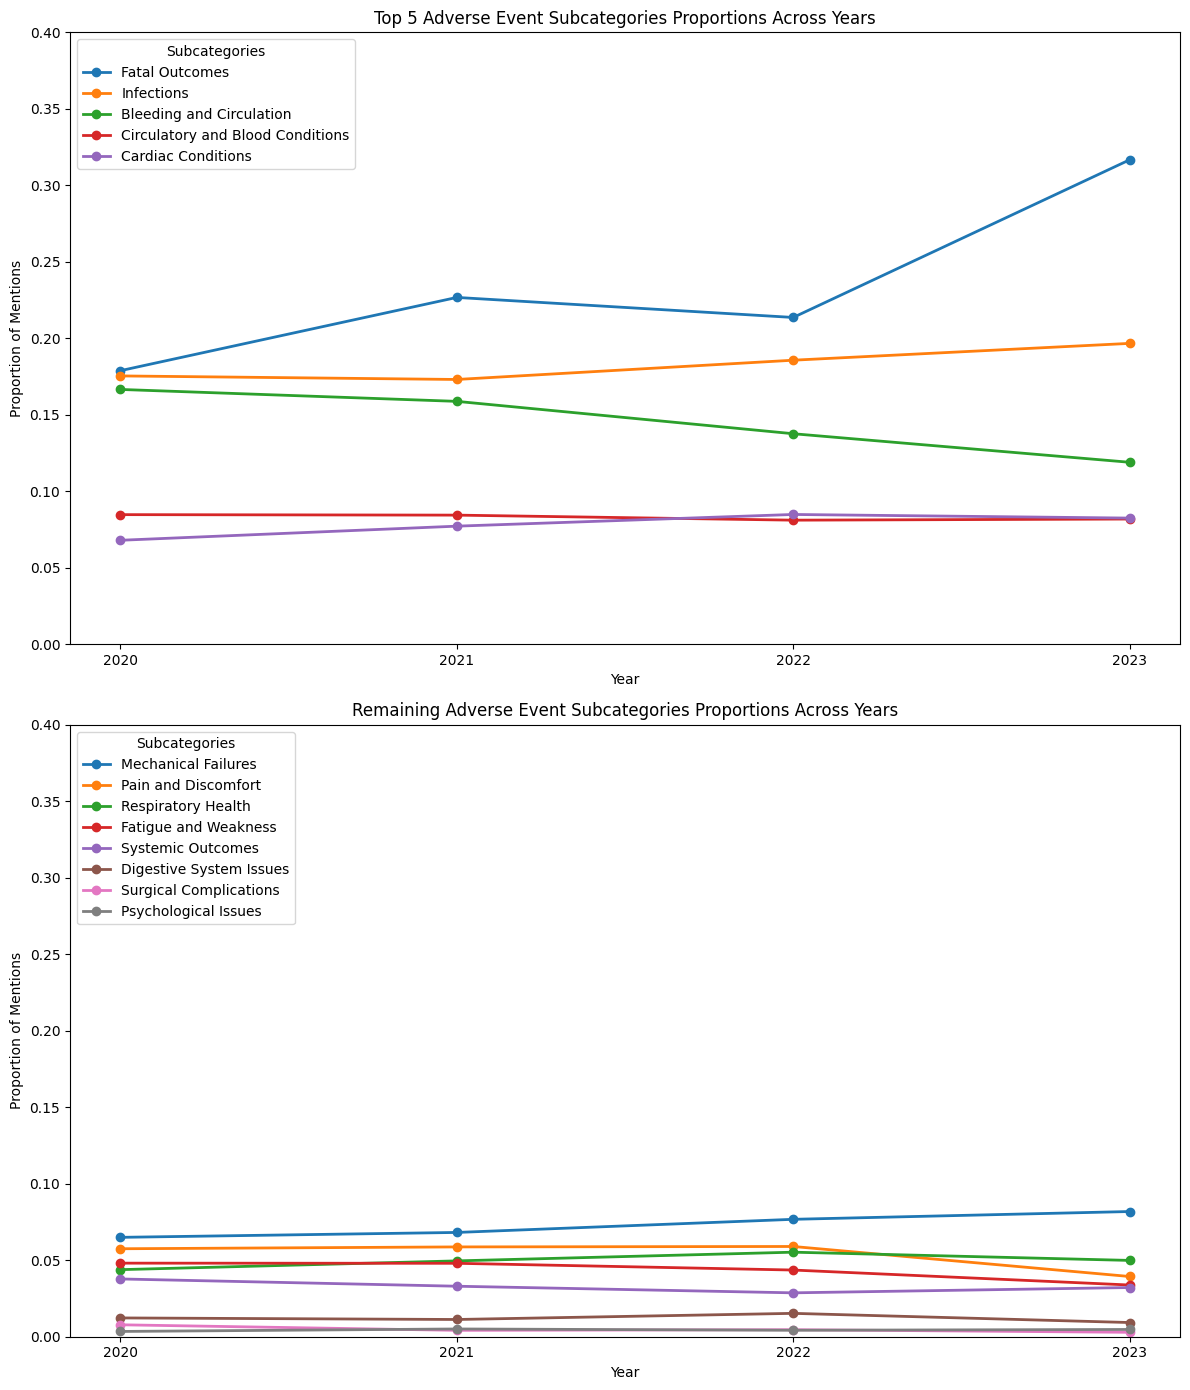

In [17]:
# Ensure adverseEvents is a standalone DataFrame
adverseEvents = adverseEvents.copy()

# Ensure FOI_TEXT is a string and handle any NaN values
adverseEvents['FOI_TEXT'].fillna('', inplace=True)

# Initialize the DataFrame to store subcategory trends
subcategory_trends = pd.DataFrame()

# Process each subcategory
for subcategory, keywords in subcategories.items():
    # Create a pattern that matches any of the keywords in the subcategory
    pattern = r'\b(' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'
    adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
    # Group by 'Year' and sum the 'subcategory_match' column to count occurrences
    adverseEvents['Year'] = adverseEvents['DATE_RECEIVED'].dt.year
    subcategory_counts = adverseEvents.groupby('Year')['subcategory_match'].sum()
    subcategory_trends[subcategory] = subcategory_counts

# Calculate the total number of reports per year
total_reports_per_year = adverseEvents.groupby('Year').size()

# Normalize the counts by the total number of reports per year
subcategory_trends_normalized = subcategory_trends.div(total_reports_per_year, axis=0)

# Replace NaN values with 0
subcategory_trends_normalized = subcategory_trends_normalized.fillna(0)

# Transpose to align years for plotting
subcategory_trends_normalized = subcategory_trends_normalized.transpose()

# Calculate total mentions for each subcategory and get the top ones
subcategory_sums = subcategory_trends_normalized.sum(axis=1)
top_subcategories = subcategory_sums.sort_values(ascending=False)

# Split into top 5 and the rest
top_5_subcategories = top_subcategories.head(5).index
bottom_subcategories = top_subcategories.tail(len(top_subcategories) - 5).index

# Data for plotting
top_5_data = subcategory_trends_normalized.loc[top_5_subcategories]
bottom_data = subcategory_trends_normalized.loc[bottom_subcategories]

# Plot data function with subplots
def plot_data():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))  # Set up 2 rows, 1 column

    # Plot the top 5 subcategories
    for subcategory in top_5_data.index:
        ax1.plot(top_5_data.columns, top_5_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax1.set_title('Top 5 Adverse Event Subcategories Proportions Across Years')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Proportion of Mentions')
    ax1.legend(title="Subcategories", loc='upper left')
    ax1.set_xticks(top_5_data.columns)
    ax1.set_ylim(0, 0.4)

    # Plot the remaining subcategories
    for subcategory in bottom_data.index:
        ax2.plot(bottom_data.columns, bottom_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax2.set_title('Remaining Adverse Event Subcategories Proportions Across Years')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Proportion of Mentions')
    ax2.legend(title="Subcategories", loc='upper left')
    ax2.set_xticks(bottom_data.columns)
    ax2.set_ylim(0, 0.4)

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_data()

# Clean up the temporary column
adverseEvents.drop('subcategory_match', axis=1, inplace=True)

## By Year Visualisation (Quarterly Breakdown)

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2984489311.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2984489311.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2984489311.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2984489311.py:17: Us

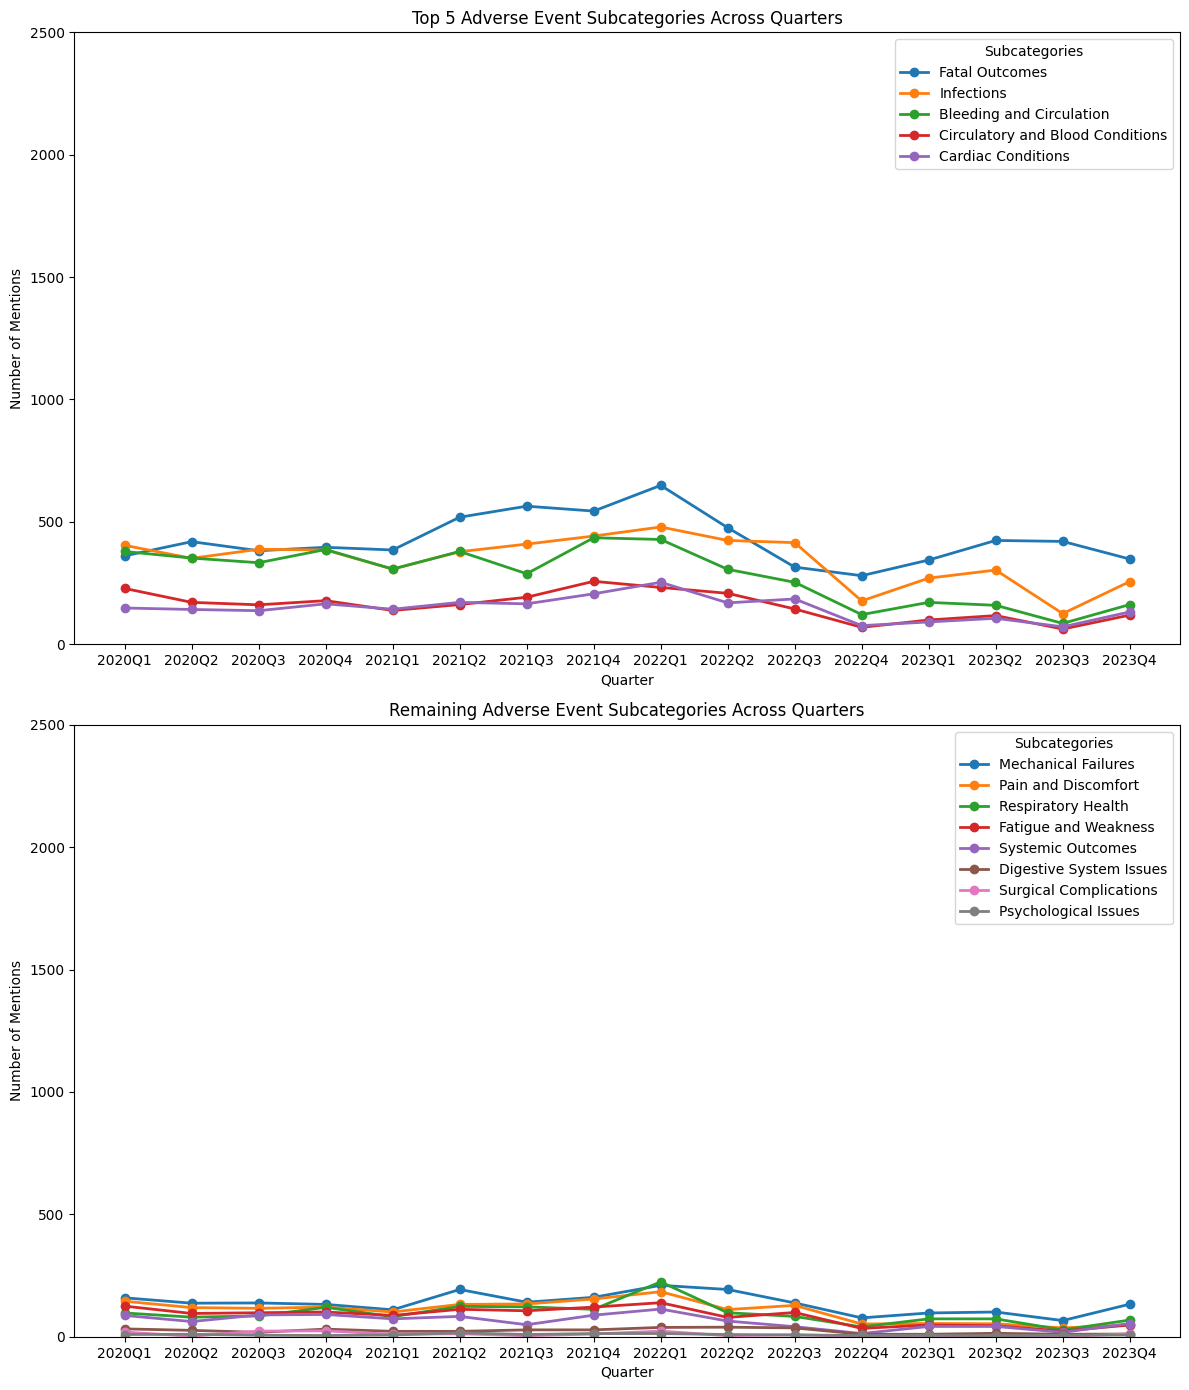

In [18]:
# Ensure adverseEvents is a standalone DataFrame
adverseEvents = adverseEvents.copy()

# Ensure the DATE_RECEIVED column is in datetime format
adverseEvents['DATE_RECEIVED'] = pd.to_datetime(adverseEvents['DATE_RECEIVED'])

# Create a Quarter column
adverseEvents['Quarter'] = adverseEvents['DATE_RECEIVED'].dt.to_period('Q')

# Initialize the DataFrame to store subcategory trends
subcategory_trends = pd.DataFrame()

# Process each subcategory
for subcategory, keywords in subcategories.items():
    # Create a pattern that matches any of the keywords in the subcategory
    pattern = r'\b(' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'
    adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
    # Group by 'Quarter' and sum the 'subcategory_match' column to count occurrences
    subcategory_counts = adverseEvents.groupby('Quarter')['subcategory_match'].sum()
    subcategory_trends[subcategory] = subcategory_counts

# Transpose to align quarters for plotting
subcategory_trends = subcategory_trends.transpose()

# Calculate total mentions for each subcategory and get the top ones
subcategory_sums = subcategory_trends.sum(axis=1)
top_subcategories = subcategory_sums.sort_values(ascending=False)

# Split into top 5 and the rest
top_5_subcategories = top_subcategories.head(5).index
bottom_subcategories = top_subcategories.tail(len(top_subcategories) - 5).index

# Data for plotting
top_5_data = subcategory_trends.loc[top_5_subcategories]
bottom_data = subcategory_trends.loc[bottom_subcategories]

# Plot data function with subplots
def plot_data():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))  # Set up 2 rows, 1 column

    # Plot the top 5 subcategories
    for subcategory in top_5_data.index:
        ax1.plot(top_5_data.columns.astype(str), top_5_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax1.set_title('Top 5 Adverse Event Subcategories Across Quarters')
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Number of Mentions')
    ax1.legend(title="Subcategories", loc='upper right')
    ax1.set_ylim(0, 2500)  # Set y-axis limit

    # Plot the remaining subcategories
    for subcategory in bottom_data.index:
        ax2.plot(bottom_data.columns.astype(str), bottom_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax2.set_title('Remaining Adverse Event Subcategories Across Quarters')
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Number of Mentions')
    ax2.legend(title="Subcategories", loc='upper right')
    ax2.set_ylim(0, 2500)  # Set y-axis limit

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_data()

# Clean up the temporary column
adverseEvents.drop('subcategory_match', axis=1, inplace=True)

C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2739394911.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2739394911.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2739394911.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\2739394911.py:17: Us

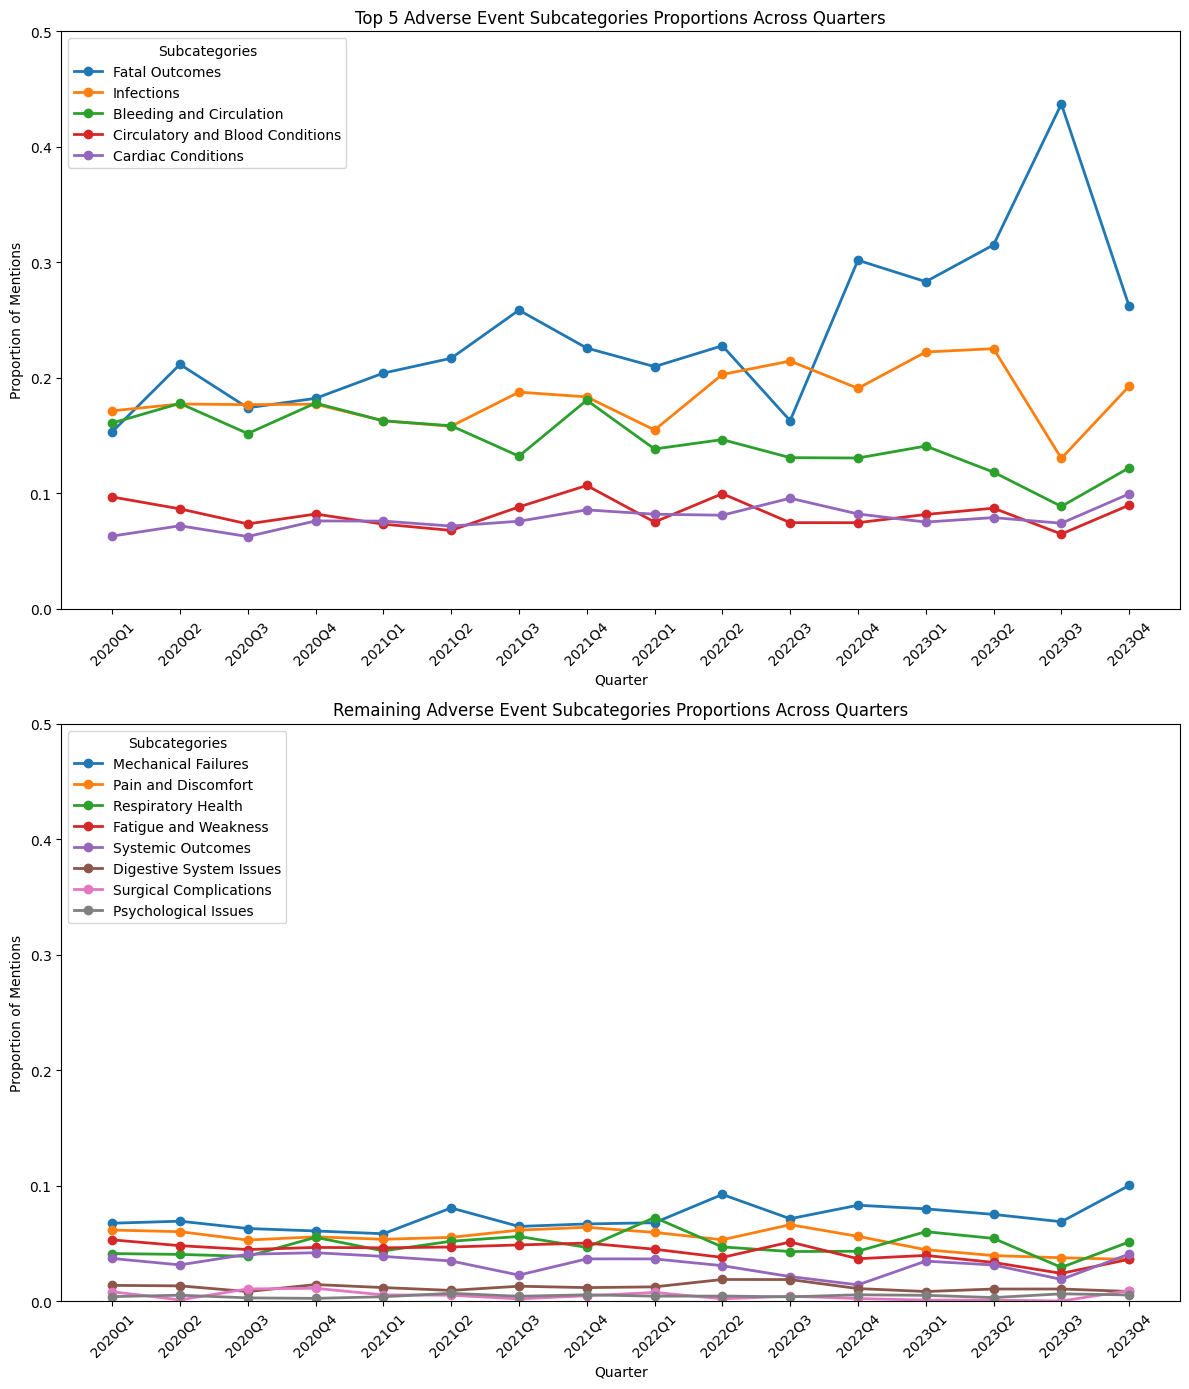

In [19]:
# Ensure adverseEvents is a standalone DataFrame
adverseEvents = adverseEvents.copy()

# Ensure the DATE_RECEIVED column is in datetime format
adverseEvents['DATE_RECEIVED'] = pd.to_datetime(adverseEvents['DATE_RECEIVED'])

# Create a Quarter column
adverseEvents['Quarter'] = adverseEvents['DATE_RECEIVED'].dt.to_period('Q').astype(str)

# Initialize the DataFrame to store subcategory trends
subcategory_trends = pd.DataFrame()

# Process each subcategory
for subcategory, keywords in subcategories.items():
    # Create a pattern that matches any of the keywords in the subcategory
    pattern = r'\b(' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'
    adverseEvents['subcategory_match'] = adverseEvents['FOI_TEXT'].str.contains(pattern, case=False, na=False)
    # Group by 'Quarter' and sum the 'subcategory_match' column to count occurrences
    subcategory_counts = adverseEvents.groupby('Quarter')['subcategory_match'].sum()
    subcategory_trends[subcategory] = subcategory_counts

# Calculate the total number of reports per quarter
total_reports_per_quarter = adverseEvents.groupby('Quarter').size()

# Normalize the counts by the total number of reports per quarter
subcategory_trends_normalized = subcategory_trends.div(total_reports_per_quarter, axis=0)

# Replace NaN values with 0
subcategory_trends_normalized = subcategory_trends_normalized.fillna(0)

# Transpose to align quarters for plotting
subcategory_trends_normalized = subcategory_trends_normalized.transpose()

# Calculate total mentions for each subcategory and get the top ones
subcategory_sums = subcategory_trends_normalized.sum(axis=1)
top_subcategories = subcategory_sums.sort_values(ascending=False)

# Split into top 5 and the rest
top_5_subcategories = top_subcategories.head(5).index
bottom_subcategories = top_subcategories.tail(len(top_subcategories) - 5).index

# Data for plotting
top_5_data = subcategory_trends_normalized.loc[top_5_subcategories]
bottom_data = subcategory_trends_normalized.loc[bottom_subcategories]

# Plot data function with subplots
def plot_data():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))  # Set up 2 rows, 1 column

    # Plot the top 5 subcategories
    for subcategory in top_5_data.index:
        ax1.plot(top_5_data.columns, top_5_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax1.set_title('Top 5 Adverse Event Subcategories Proportions Across Quarters')
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Proportion of Mentions')
    ax1.legend(title="Subcategories", loc='upper left')
    ax1.set_xticks(range(len(top_5_data.columns)))
    ax1.set_xticklabels(top_5_data.columns, rotation=45)
    ax1.set_ylim(0, 0.5)

    # Plot the remaining subcategories
    for subcategory in bottom_data.index:
        ax2.plot(bottom_data.columns, bottom_data.loc[subcategory], label=subcategory, marker='o', linewidth=2)
    ax2.set_title('Remaining Adverse Event Subcategories Proportions Across Quarters')
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Proportion of Mentions')
    ax2.legend(title="Subcategories", loc='upper left')
    ax2.set_xticks(range(len(bottom_data.columns)))
    ax2.set_xticklabels(bottom_data.columns, rotation=45)
    ax2.set_ylim(0, 0.5) 

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_data()

# Clean up the temporary column
adverseEvents.drop('subcategory_match', axis=1, inplace=True)

## Part B : Analysis Continuation

### Topic Modeling

### Using Gensim Library - No. of Topics 6 (ideal)

Topic 1: (0, '0.028*"passed" + 0.028*"away" + 0.026*"bleeding" + 0.018*"blood" + 0.011*"death" + 0.011*"stroke" + 0.009*"tomography" + 0.009*"gastrointestinal" + 0.007*"hemoglobin" + 0.007*"bleed" + 0.007*"hemorrhage" + 0.007*"red" + 0.007*"hospital" + 0.006*"head" + 0.006*"scan"')
Topic 2: (1, '0.211*"device" + 0.139*"vad" + 0.107*"ventricular" + 0.054*"complications" + 0.029*"concerning" + 0.025*"hospitalized" + 0.016*"death" + 0.014*"failure" + 0.013*"therapy" + 0.012*"expired" + 0.009*"outcome" + 0.009*"operated" + 0.008*"explanted" + 0.007*"medication" + 0.006*"dysfunction"')
Topic 3: (2, '0.039*"low" + 0.035*"pump" + 0.035*"controller" + 0.032*"alarms" + 0.030*"flow" + 0.029*"power" + 0.020*"driveline" + 0.013*"alarm" + 0.009*"battery" + 0.009*"cable" + 0.006*"hospital" + 0.006*"emergency" + 0.005*"fault" + 0.005*"flows" + 0.005*"batteries"')
Topic 4: (3, '0.067*"infection" + 0.049*"driveline" + 0.026*"antibiotics" + 0.021*"cultures" + 0.019*"positive" + 0.016*"drainage" + 0.015*

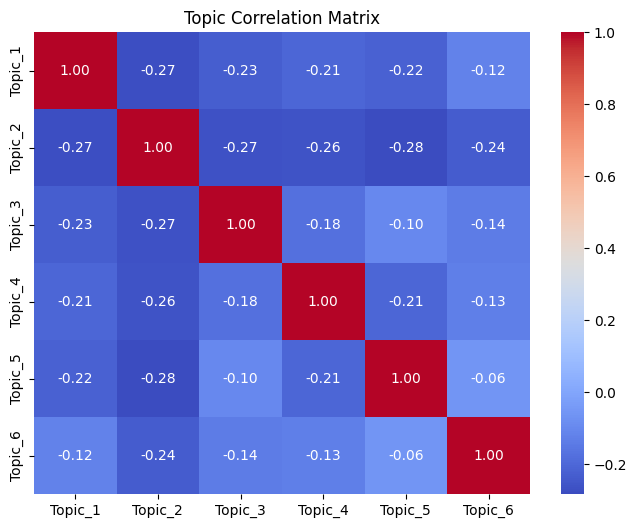

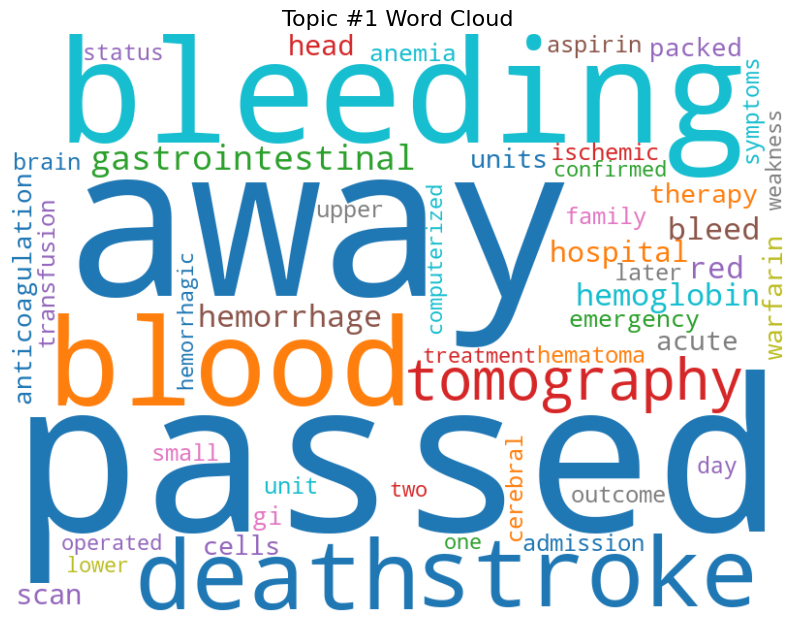

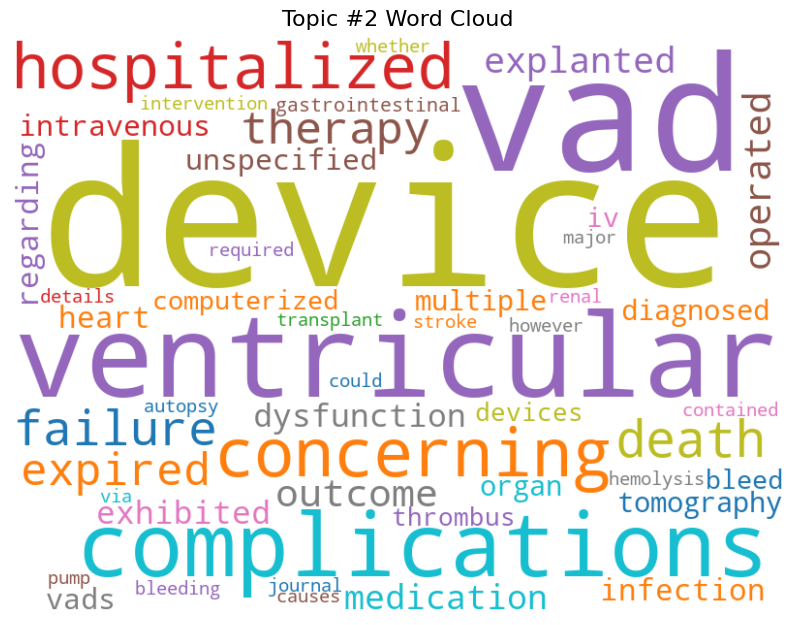

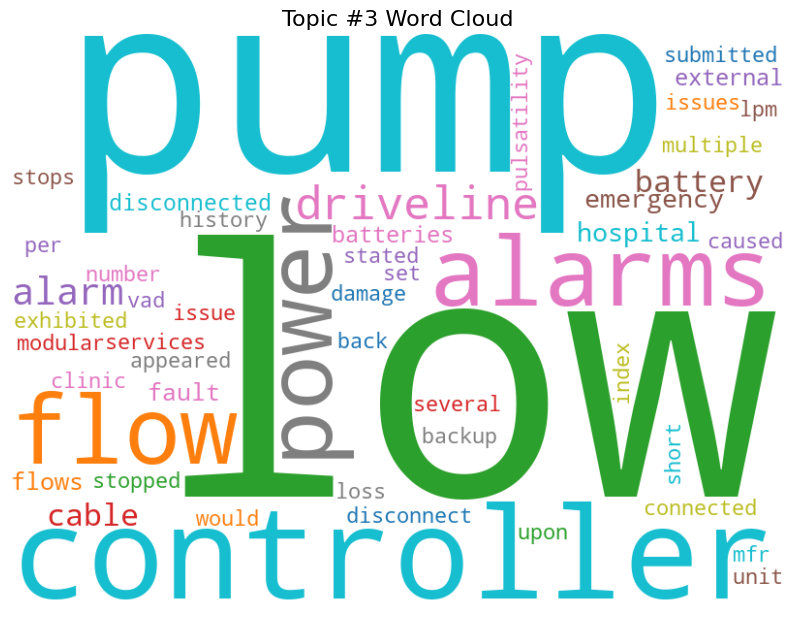

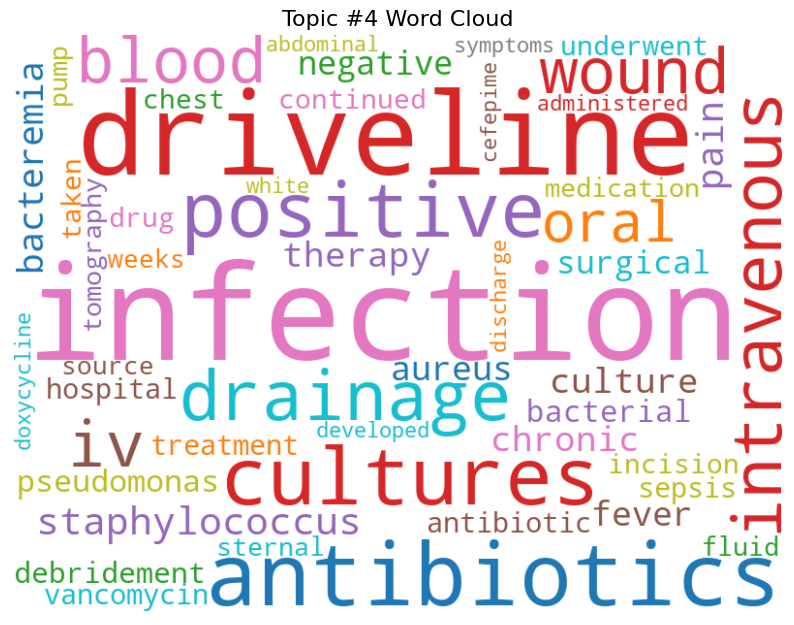

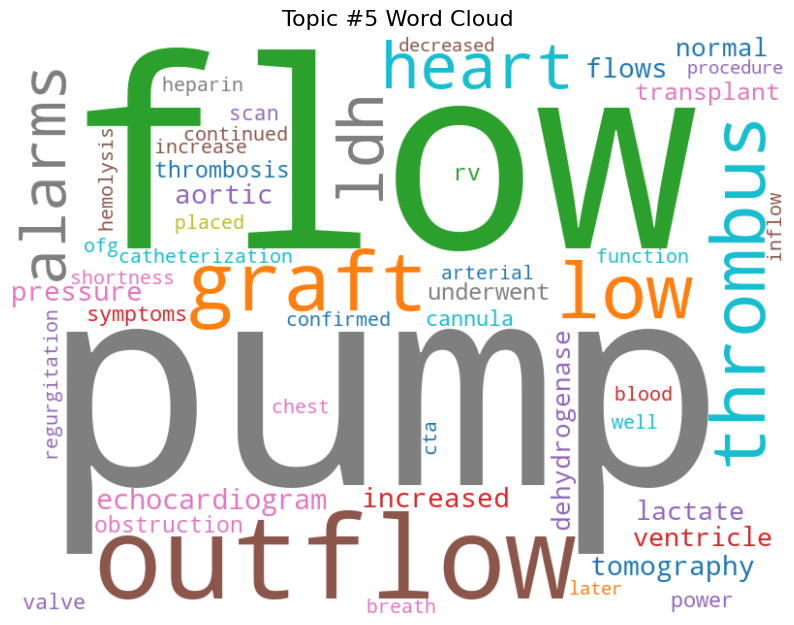

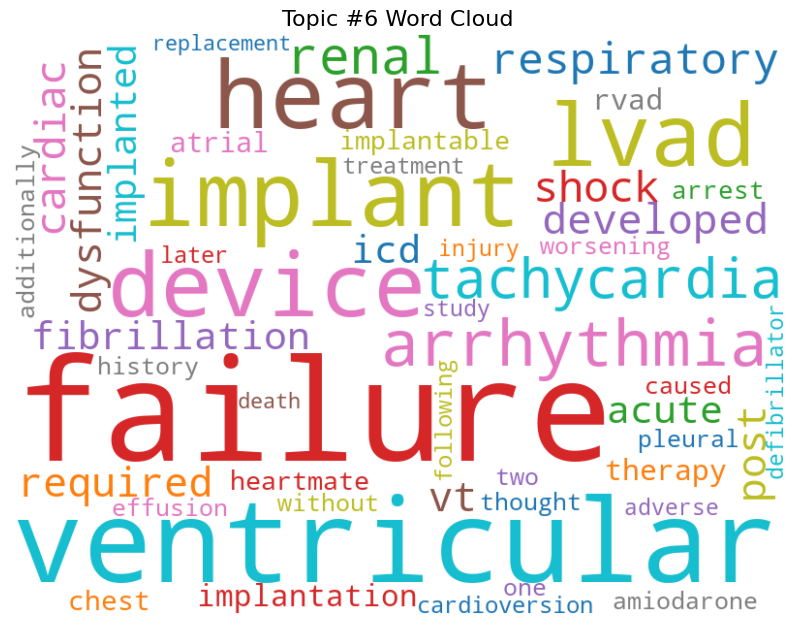

Coherence Score: 0.6105381182358579


In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns 

# Set up stopwords
stop_words = set(stopwords.words('english'))

# Add the additional stopwords
additional_stop_words = {
    'noted', 'patient', 'reported', 'log', 'registry', 'event',
    'data', 'also', 'started', 'additional', 'ct', 'right', 'left', 'due', 'remains', 'possible', 'patients', 'admitted', 'showed', 'received',
    'exit', 'provided', 'report', 'use', 'made', 'site', 'computed', 'discharged', 'performed', 'experienced',
    'home', 'care', 'presented', 'given', 'events', 'file', 'speed',
    'exchange', 'files', 'review', 'related', 'pi', 'captured', 'found', 'system', 'exchanged', 'time',
    'repair', 'stop', 'manufacturer', 'occurred', 'information', 'assist', 'result', 'cause',
    'unknown', 'expected', 'considered', 'suspected', 'returned', 'high', 'evaluation', 'subsequently', 'support', 'clinical', 'date',
    'available', 'likely', 'based', 'previously', 'outcomes', 'therefore', 'analysis', 'identifying', 'correlated', 'contain',
    'tracks', 'article', 'part', 'requiring', 'reviewed', 'resolved', 'normalized', 'ratio', 'revealed',
    'prior', 'days', 'stable', 'treated', 'b', 'inr', 'elevated', 'international', 'intermacs'
}
stop_words.update(additional_stop_words)

# From this subset
adverseEvents_subset = adverseEvents.copy()

# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove non-alphabetic tokens and stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Apply preprocessing to the 'FOI_TEXT' column
adverseEvents_subset['processed_text'] = adverseEvents_subset['FOI_TEXT'].astype(str).apply(preprocess_text)

# Remove empty documents
adverseEvents_subset = adverseEvents_subset[adverseEvents_subset['processed_text'].map(len) > 0]

# Create a dictionary and corpus for Gensim
dictionary = corpora.Dictionary(adverseEvents_subset['processed_text'])
corpus = [dictionary.doc2bow(text) for text in adverseEvents_subset['processed_text']]

# Perform LDA topic modeling with Gensim
num_topics = 6  # Specify the desired number of topics
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,
    iterations=100
)

# Display topics (starting numbering from 1)
topics = lda_model.print_topics(num_topics=num_topics, num_words=15)
for topic_idx, topic in enumerate(topics, start=1):
    print(f"Topic {topic_idx}: {topic}")

# Add topic assignments to the DataFrame (start numbering from 1)
adverseEvents_subset['Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] + 1 for doc in corpus]

# === Added code to calculate topic proportions ===

# Count the number of documents assigned to each topic
topic_counts = adverseEvents_subset['Topic'].value_counts().sort_index()

# Calculate the proportion of documents for each topic
total_documents = len(adverseEvents_subset)
topic_proportions = topic_counts / total_documents

# Display the counts and proportions
print("\nTopic Counts and Proportions:")
for topic_num in range(1, num_topics + 1):
    count = topic_counts.get(topic_num, 0)
    proportion = topic_proportions.get(topic_num, 0)
    print(f"Topic {topic_num}: Count = {count}, Proportion = {proportion:.4f}")

# Extract topic distributions for each document
document_topics = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Convert the list of topic distributions into a DataFrame
topic_distributions = pd.DataFrame([
    [prob for topic_id, prob in doc] for doc in document_topics
])

# Rename columns for clarity
topic_distributions.columns = [f"Topic_{i + 1}" for i in range(num_topics)]

# Add the topic distributions to the DataFrame
adverseEvents_subset = pd.concat([adverseEvents_subset.reset_index(drop=True), topic_distributions], axis=1)

# Compute the correlation matrix between topics
topic_correlation_matrix = topic_distributions.corr()

# Display the correlation matrix
print("\nTopic Correlation Matrix:")
print(topic_correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(topic_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Topic Correlation Matrix')
plt.show()

# Generate word clouds for each topic (starting from 1)
for topic_idx in range(1, num_topics + 1):
    # Get the words and their weights for the topic
    topic_terms = lda_model.get_topic_terms(topic_idx - 1, topn=50)  # Use topic_idx - 1 for LDA input
    word_freq = {dictionary[word_id]: weight for word_id, weight in topic_terms}

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=50,
        colormap='tab10'
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{topic_idx} Word Cloud', fontsize=16)
    plt.show()

# Compute coherence score to evaluate the topic model
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=adverseEvents_subset['processed_text'],
    dictionary=dictionary,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


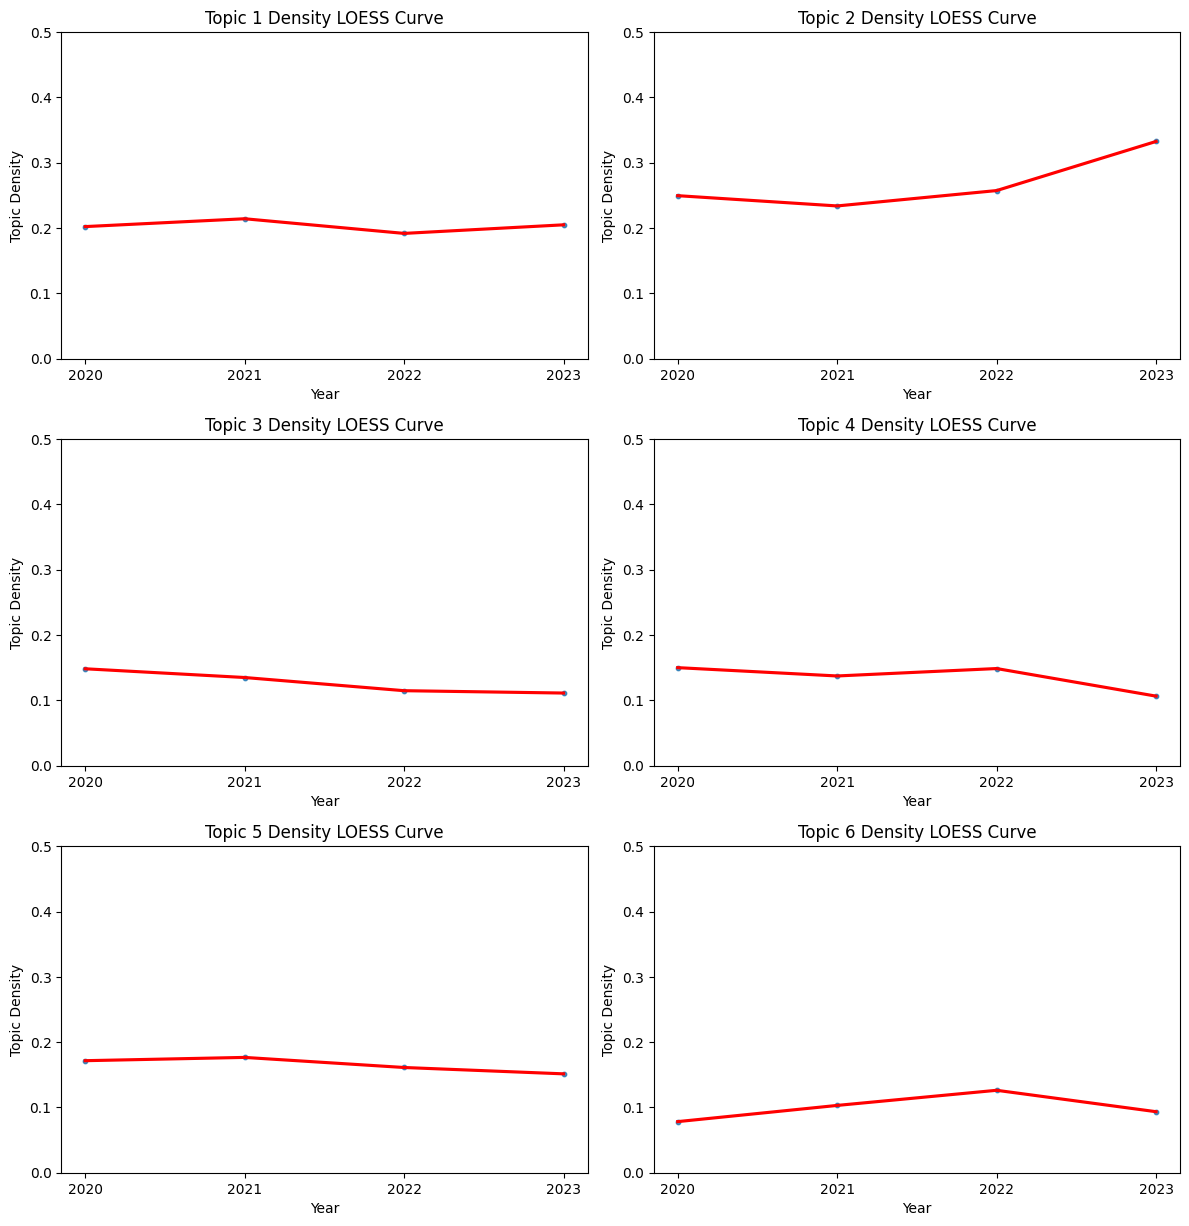

In [27]:
# Ensure the 'DATE_RECEIVED' column exists and is in datetime format
adverseEvents_subset['DATE_RECEIVED'] = pd.to_datetime(adverseEvents_subset['DATE_RECEIVED'], errors='coerce')

# Drop rows with invalid or missing dates
adverseEvents_subset = adverseEvents_subset.dropna(subset=['DATE_RECEIVED'])

# Extract the year from the 'DATE_RECEIVED' column
adverseEvents_subset['Year'] = adverseEvents_subset['DATE_RECEIVED'].dt.year

# Import necessary packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of documents per topic per year
topic_year_counts = adverseEvents_subset.groupby(['Year', 'Topic']).size().reset_index(name='Counts')

# Calculate the total number of documents per year
total_docs_per_year = adverseEvents_subset.groupby('Year').size().reset_index(name='TotalDocs')

# Merge the total documents per year into the topic_year_counts
topic_year_counts = topic_year_counts.merge(total_docs_per_year, on='Year')

# Calculate the proportion (density) of each topic in each year
topic_year_counts['Density'] = topic_year_counts['Counts'] / topic_year_counts['TotalDocs']

# Set up the plotting space (4 subplots for each topic)
plt.figure(figsize=(12, 16))

# Loop over topics, and plot in separate subplots (4 subplots per graph)
for topic_num in range(1, 7):  # Adjust to start numbering from 1 to 6
    plt.subplot(4, 2, topic_num)  # Create 4x2 subplots, topic_num is already 1-based

    # Subset data for this specific topic
    topic_data = topic_year_counts[topic_year_counts['Topic'] == topic_num]
    
    # Plot using LOESS smoothing with confidence interval shading
    sns.regplot(
        data=topic_data,
        x='Year',
        y='Density',  # Plot density instead of raw counts
        lowess=True,
        scatter_kws={'s': 10},  # Scatter point size
        line_kws={'color': 'red'},  # Color of the LOESS line
        ci=95  # Confidence interval of 95%
    )
    
    plt.xlabel('Year')
    plt.ylabel('Topic Density')
    plt.title(f'Topic {topic_num} Density LOESS Curve')

    # Set y-axis limit from 0 to 0.5
    plt.ylim(0, 0.5)
    
    # Set x-ticks to show only whole years like 2020, 2021, 2022, etc.
    plt.xticks([2020, 2021, 2022, 2023])

# Adjust layout
plt.tight_layout()
plt.show()


#### No. of Topics 5 (low coherence score)

Topic 1: (0, '0.021*"bleeding" + 0.016*"blood" + 0.008*"stroke" + 0.008*"tomography" + 0.008*"tachycardia" + 0.007*"gastrointestinal" + 0.007*"hemoglobin" + 0.006*"arrhythmia" + 0.006*"acute" + 0.006*"ventricular" + 0.006*"bleed" + 0.006*"red" + 0.005*"vt" + 0.005*"scan" + 0.005*"head"')
Topic 2: (1, '0.204*"device" + 0.127*"vad" + 0.109*"ventricular" + 0.049*"complications" + 0.027*"concerning" + 0.023*"hospitalized" + 0.021*"failure" + 0.017*"therapy" + 0.016*"death" + 0.012*"expired" + 0.008*"operated" + 0.007*"dysfunction" + 0.007*"medication" + 0.007*"exhibited" + 0.006*"heart"')
Topic 3: (2, '0.033*"pump" + 0.030*"controller" + 0.029*"low" + 0.028*"passed" + 0.028*"away" + 0.025*"alarms" + 0.025*"power" + 0.023*"flow" + 0.018*"driveline" + 0.012*"death" + 0.012*"alarm" + 0.008*"battery" + 0.008*"cable" + 0.007*"hospital" + 0.007*"outcome"')
Topic 4: (3, '0.063*"infection" + 0.045*"driveline" + 0.024*"antibiotics" + 0.020*"cultures" + 0.018*"positive" + 0.015*"drainage" + 0.014*"i

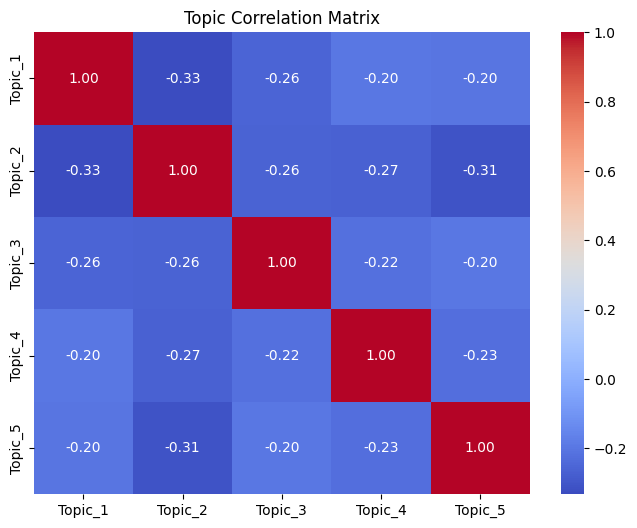

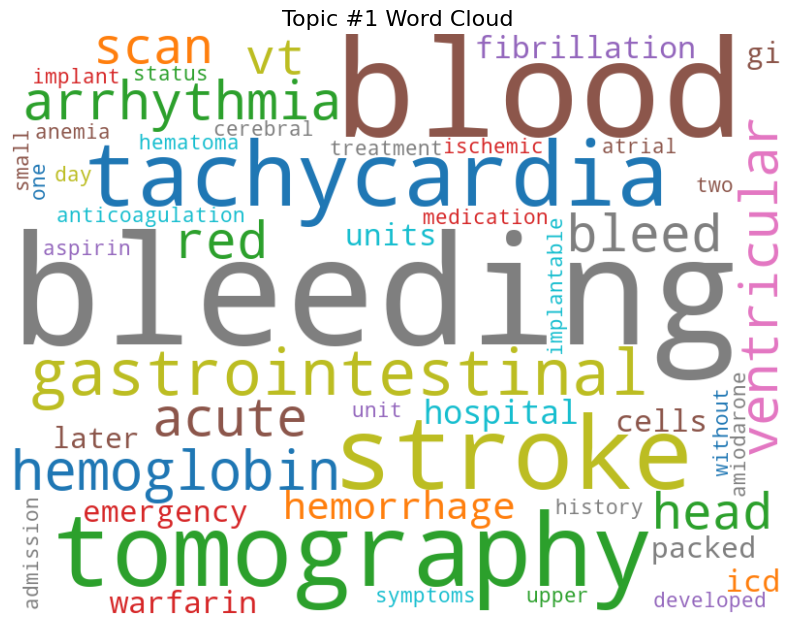

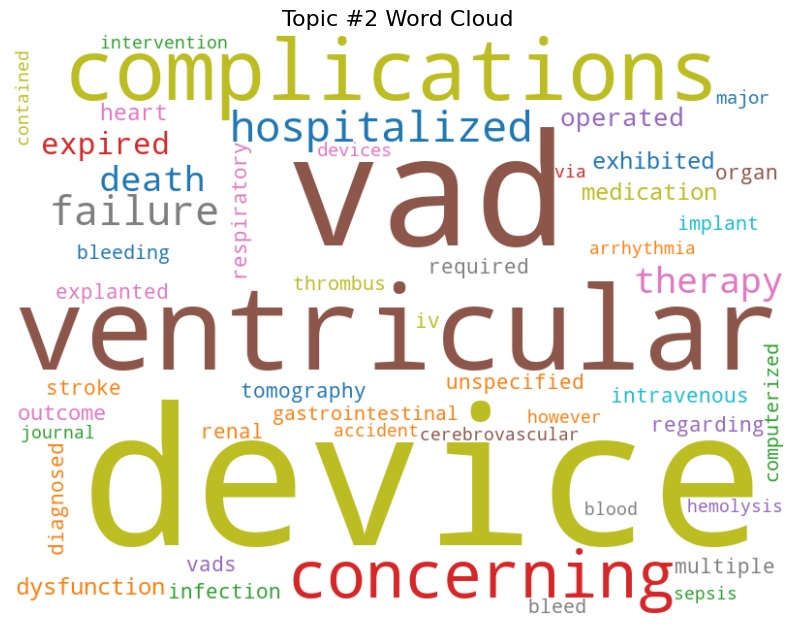

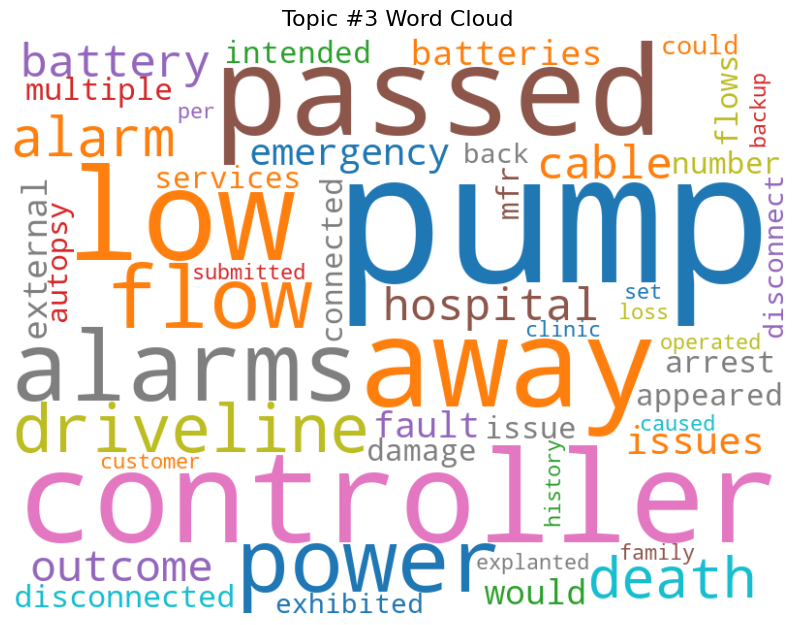

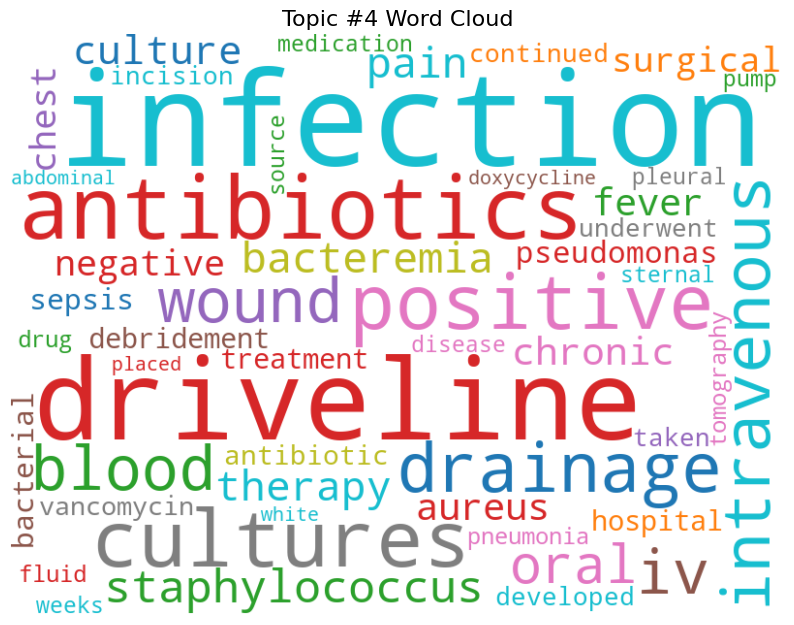

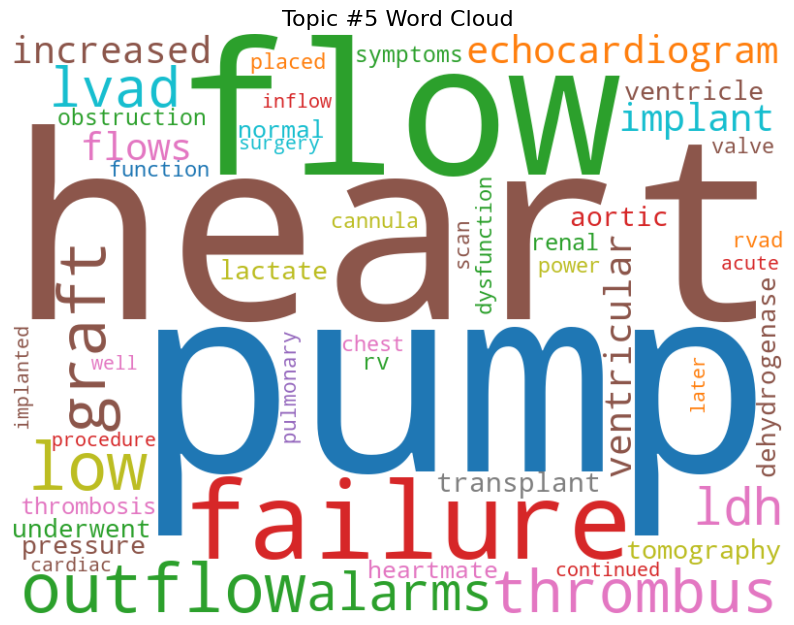

Coherence Score: 0.5613265119419175


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns  

# Set up stopwords
stop_words = set(stopwords.words('english'))

# Add the additional stopwords
additional_stop_words = {
    'noted', 'patient', 'reported', 'log', 'registry', 'event',
    'data', 'also', 'started', 'additional', 'ct', 'right', 'left', 'due', 'remains', 'possible', 'patients', 'admitted', 'showed', 'received',
    'exit', 'provided', 'report', 'use', 'made', 'site', 'computed', 'discharged', 'performed', 'experienced',
    'home', 'care', 'presented', 'given', 'events', 'file', 'speed',
    'exchange', 'files', 'review', 'related', 'pi', 'captured', 'found', 'system', 'exchanged', 'time',
    'repair', 'stop', 'manufacturer', 'occurred', 'information', 'assist', 'result', 'cause',
    'unknown', 'expected', 'considered', 'suspected', 'returned', 'high', 'evaluation', 'subsequently', 'support', 'clinical', 'date',
    'available', 'likely', 'based', 'previously', 'outcomes', 'therefore', 'analysis', 'identifying', 'correlated', 'contain',
    'tracks', 'article', 'part', 'requiring', 'reviewed', 'resolved', 'normalized', 'ratio', 'revealed',
    'prior', 'days', 'stable', 'treated', 'b', 'inr', 'elevated', 'international', 'intermacs'
}
stop_words.update(additional_stop_words)

# From this subset
adverseEvents_subset = adverseEvents.copy()

# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove non-alphabetic tokens and stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Apply preprocessing to the 'FOI_TEXT' column
adverseEvents_subset['processed_text'] = adverseEvents_subset['FOI_TEXT'].astype(str).apply(preprocess_text)

# Remove empty documents
adverseEvents_subset = adverseEvents_subset[adverseEvents_subset['processed_text'].map(len) > 0]

# Create a dictionary and corpus for Gensim
dictionary = corpora.Dictionary(adverseEvents_subset['processed_text'])
corpus = [dictionary.doc2bow(text) for text in adverseEvents_subset['processed_text']]

# Perform LDA topic modeling with Gensim
num_topics = 5  # Specify the desired number of topics
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,
    iterations=100
)

# Display topics (starting numbering from 1)
topics = lda_model.print_topics(num_topics=num_topics, num_words=15)
for topic_idx, topic in enumerate(topics, start=1):
    print(f"Topic {topic_idx}: {topic}")

# Add topic assignments to the DataFrame (start numbering from 1)
adverseEvents_subset['Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] + 1 for doc in corpus]

# Count the number of documents assigned to each topic
topic_counts = adverseEvents_subset['Topic'].value_counts().sort_index()

# Calculate the proportion of documents for each topic
total_documents = len(adverseEvents_subset)
topic_proportions = topic_counts / total_documents

# Display the counts and proportions
print("\nTopic Counts and Proportions:")
for topic_num in range(1, num_topics + 1):
    count = topic_counts.get(topic_num, 0)
    proportion = topic_proportions.get(topic_num, 0)
    print(f"Topic {topic_num}: Count = {count}, Proportion = {proportion:.4f}")

# Extract topic distributions for each document
document_topics = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Convert the list of topic distributions into a DataFrame
topic_distributions = pd.DataFrame([
    [prob for topic_id, prob in doc] for doc in document_topics
])

# Rename columns for clarity
topic_distributions.columns = [f"Topic_{i + 1}" for i in range(num_topics)]

# Add the topic distributions to the DataFrame
adverseEvents_subset = pd.concat([adverseEvents_subset.reset_index(drop=True), topic_distributions], axis=1)

# Compute the correlation matrix between topics
topic_correlation_matrix = topic_distributions.corr()

# Display the correlation matrix
print("\nTopic Correlation Matrix:")
print(topic_correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(topic_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Topic Correlation Matrix')
plt.show()

# === End of code for topic correlations ===

# Generate word clouds for each topic (starting from 1)
for topic_idx in range(1, num_topics + 1):
    # Get the words and their weights for the topic
    topic_terms = lda_model.get_topic_terms(topic_idx - 1, topn=50)  # Use topic_idx - 1 for LDA input
    word_freq = {dictionary[word_id]: weight for word_id, weight in topic_terms}

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=50,
        colormap='tab10'
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{topic_idx} Word Cloud', fontsize=16)
    plt.show()

# Compute coherence score to evaluate the topic model
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=adverseEvents_subset['processed_text'],
    dictionary=dictionary,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


#### No. of Topics 7 (low coherence score)

Topic 1: (0, '0.045*"bleeding" + 0.035*"blood" + 0.021*"gastrointestinal" + 0.014*"bleed" + 0.014*"hemoglobin" + 0.013*"red" + 0.010*"cells" + 0.010*"warfarin" + 0.010*"units" + 0.009*"gi" + 0.009*"packed" + 0.009*"anemia" + 0.008*"upper" + 0.007*"transfusion" + 0.007*"aspirin"')
Topic 2: (1, '0.218*"device" + 0.139*"vad" + 0.115*"ventricular" + 0.054*"complications" + 0.029*"concerning" + 0.025*"hospitalized" + 0.025*"failure" + 0.018*"therapy" + 0.013*"death" + 0.012*"expired" + 0.008*"dysfunction" + 0.007*"medication" + 0.007*"operated" + 0.006*"heart" + 0.006*"infection"')
Topic 3: (2, '0.037*"controller" + 0.036*"passed" + 0.035*"away" + 0.033*"pump" + 0.028*"power" + 0.025*"low" + 0.024*"alarms" + 0.022*"driveline" + 0.017*"death" + 0.017*"flow" + 0.014*"alarm" + 0.011*"outcome" + 0.010*"battery" + 0.010*"cable" + 0.008*"hospital"')
Topic 4: (3, '0.072*"infection" + 0.052*"driveline" + 0.028*"antibiotics" + 0.023*"cultures" + 0.020*"positive" + 0.017*"drainage" + 0.016*"intraveno

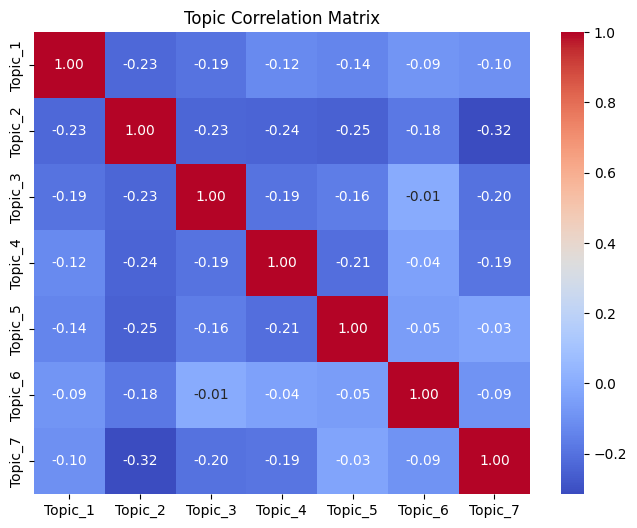

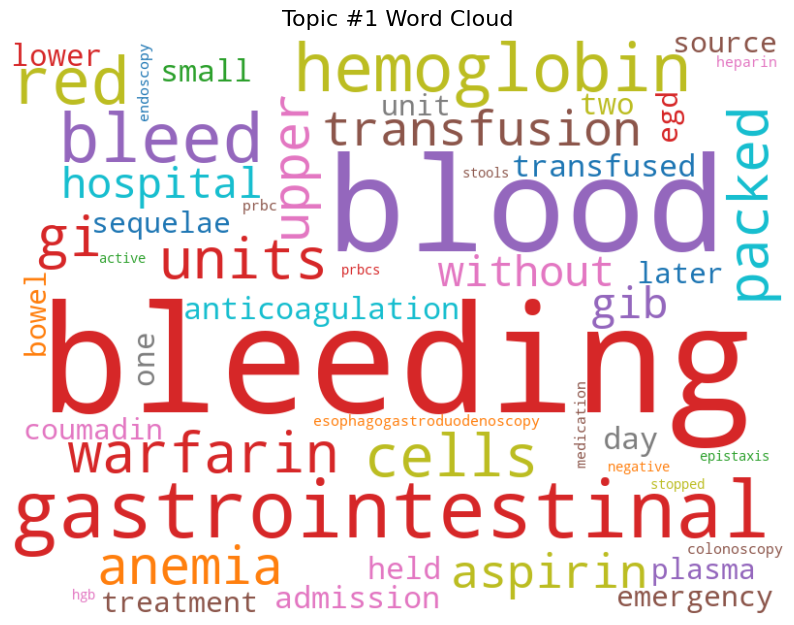

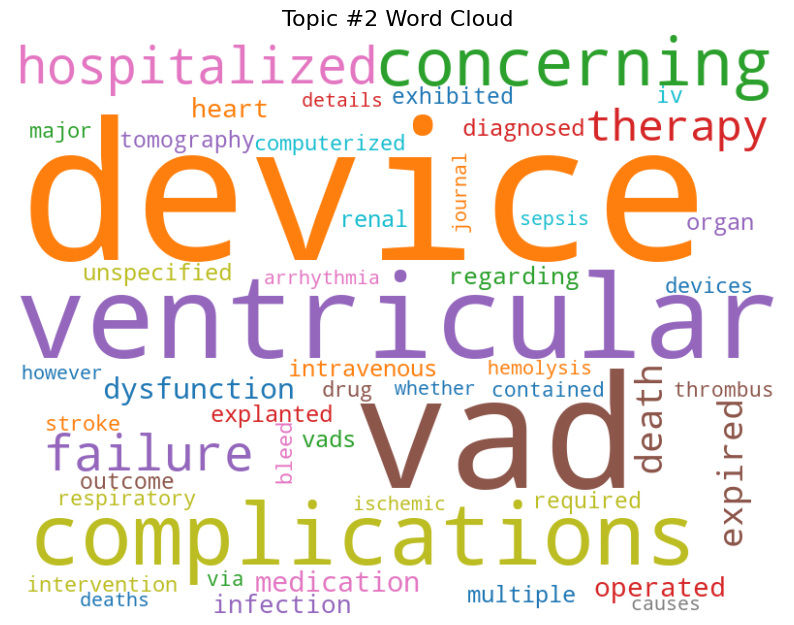

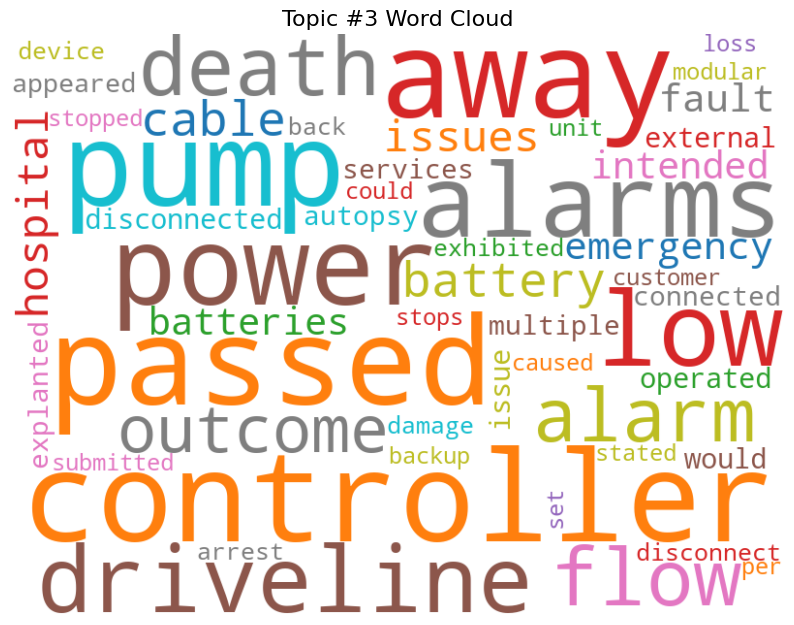

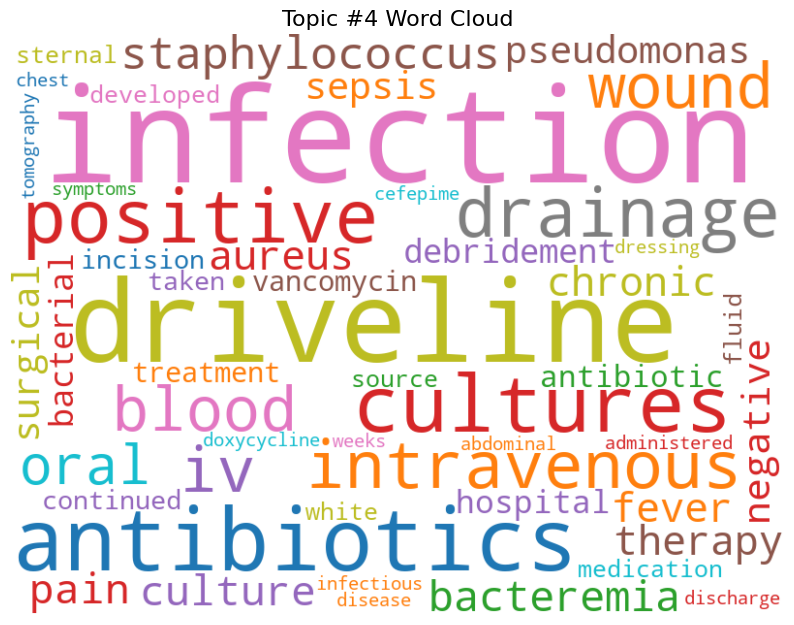

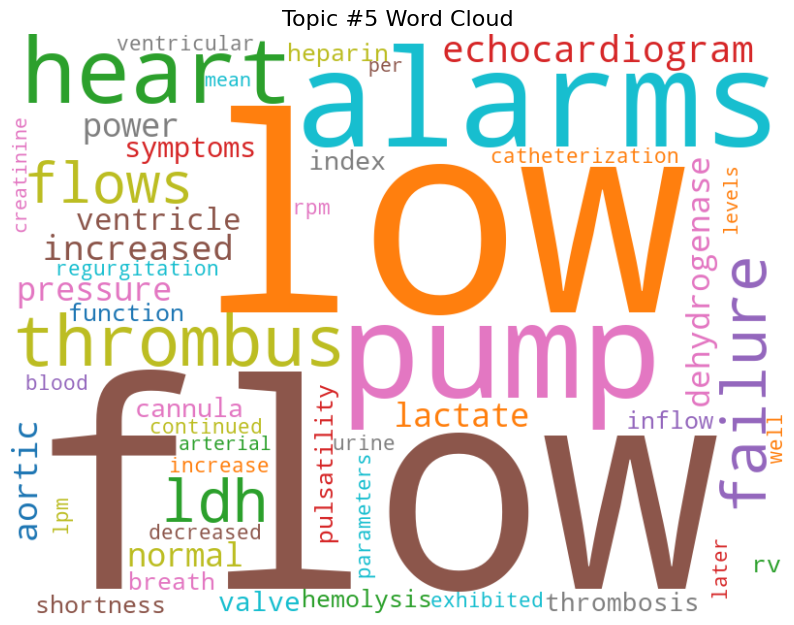

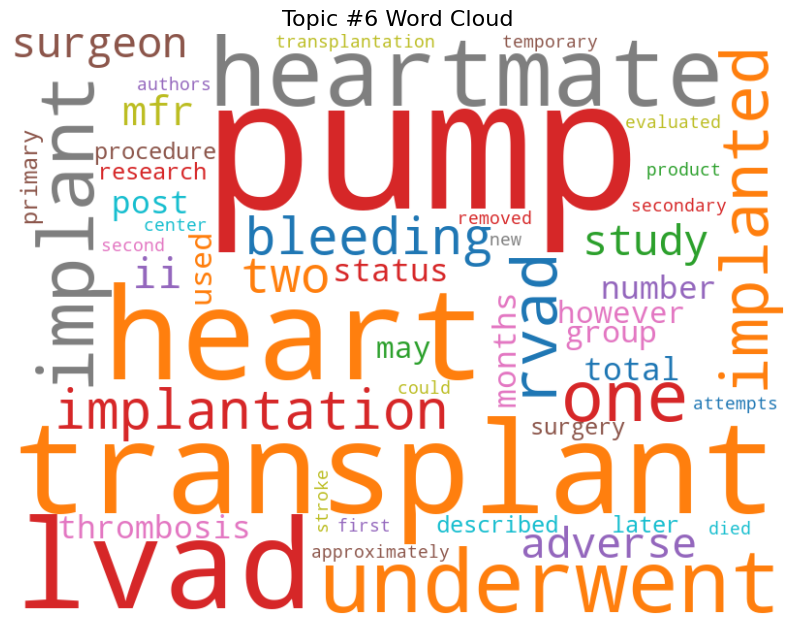

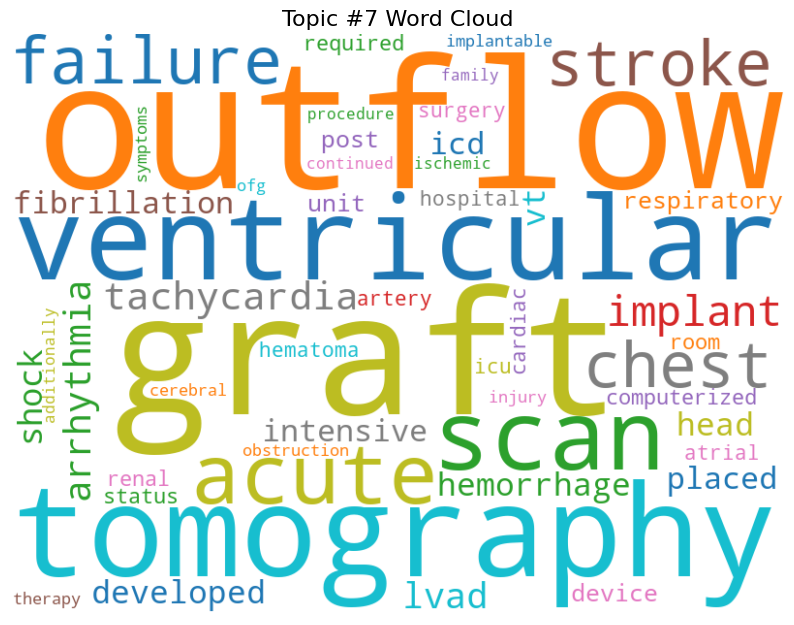

Coherence Score: 0.6091894918758262


In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns  # For heatmap and density plots

# Set up stopwords
stop_words = set(stopwords.words('english'))

# Add the additional stopwords
additional_stop_words = {
    'noted', 'patient', 'reported', 'log', 'registry', 'event',
    'data', 'also', 'started', 'additional', 'ct', 'right', 'left', 'due', 'remains', 'possible', 'patients', 'admitted', 'showed', 'received',
    'exit', 'provided', 'report', 'use', 'made', 'site', 'computed', 'discharged', 'performed', 'experienced',
    'home', 'care', 'presented', 'given', 'events', 'file', 'speed',
    'exchange', 'files', 'review', 'related', 'pi', 'captured', 'found', 'system', 'exchanged', 'time',
    'repair', 'stop', 'manufacturer', 'occurred', 'information', 'assist', 'result', 'cause',
    'unknown', 'expected', 'considered', 'suspected', 'returned', 'high', 'evaluation', 'subsequently', 'support', 'clinical', 'date',
    'available', 'likely', 'based', 'previously', 'outcomes', 'therefore', 'analysis', 'identifying', 'correlated', 'contain',
    'tracks', 'article', 'part', 'requiring', 'reviewed', 'resolved', 'normalized', 'ratio', 'revealed',
    'prior', 'days', 'stable', 'treated', 'b', 'inr', 'elevated', 'international', 'intermacs'
}
stop_words.update(additional_stop_words)

# From this subset
adverseEvents_subset = adverseEvents.copy()

# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove non-alphabetic tokens and stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Apply preprocessing to the 'FOI_TEXT' column
adverseEvents_subset['processed_text'] = adverseEvents_subset['FOI_TEXT'].astype(str).apply(preprocess_text)

# Remove empty documents
adverseEvents_subset = adverseEvents_subset[adverseEvents_subset['processed_text'].map(len) > 0]

# Create a dictionary and corpus for Gensim
dictionary = corpora.Dictionary(adverseEvents_subset['processed_text'])
corpus = [dictionary.doc2bow(text) for text in adverseEvents_subset['processed_text']]

# Perform LDA topic modeling with Gensim
num_topics = 7  # Specify the desired number of topics
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,
    iterations=100
)

# Display topics (starting numbering from 1)
topics = lda_model.print_topics(num_topics=num_topics, num_words=15)
for topic_idx, topic in enumerate(topics, start=1):
    print(f"Topic {topic_idx}: {topic}")

# Add topic assignments to the DataFrame (start numbering from 1)
adverseEvents_subset['Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] + 1 for doc in corpus]

# === Added code to calculate topic proportions ===

# Count the number of documents assigned to each topic
topic_counts = adverseEvents_subset['Topic'].value_counts().sort_index()

# Calculate the proportion of documents for each topic
total_documents = len(adverseEvents_subset)
topic_proportions = topic_counts / total_documents

# Display the counts and proportions
print("\nTopic Counts and Proportions:")
for topic_num in range(1, num_topics + 1):
    count = topic_counts.get(topic_num, 0)
    proportion = topic_proportions.get(topic_num, 0)
    print(f"Topic {topic_num}: Count = {count}, Proportion = {proportion:.4f}")

# === Code to analyze topic correlations ===

# Extract topic distributions for each document
document_topics = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Convert the list of topic distributions into a DataFrame
topic_distributions = pd.DataFrame([
    [prob for topic_id, prob in doc] for doc in document_topics
])

# Rename columns for clarity
topic_distributions.columns = [f"Topic_{i + 1}" for i in range(num_topics)]

# Add the topic distributions to the DataFrame
adverseEvents_subset = pd.concat([adverseEvents_subset.reset_index(drop=True), topic_distributions], axis=1)

# Compute the correlation matrix between topics
topic_correlation_matrix = topic_distributions.corr()

# Display the correlation matrix
print("\nTopic Correlation Matrix:")
print(topic_correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(topic_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Topic Correlation Matrix')
plt.show()

# === End of code for topic correlations ===

# Generate word clouds for each topic (starting from 1)
for topic_idx in range(1, num_topics + 1):
    # Get the words and their weights for the topic
    topic_terms = lda_model.get_topic_terms(topic_idx - 1, topn=50)  # Use topic_idx - 1 for LDA input
    word_freq = {dictionary[word_id]: weight for word_id, weight in topic_terms}

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=50,
        colormap='tab10'
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{topic_idx} Word Cloud', fontsize=16)
    plt.show()

# Compute coherence score to evaluate the topic model
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=adverseEvents_subset['processed_text'],
    dictionary=dictionary,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


### Performing Sentiment Analysis

In [25]:
pip install vaderSentiment


  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\3224439312.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  relevant_docs = adverseEvents[adverseEvents['FOI_TEXT'].str.contains(subcategory_pattern, case=False, na=False)]
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\3224439312.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  relevant_docs = adverseEvents[adverseEvents['FOI_TEXT'].str.contains(subcategory_pattern, case=False, na=False)]
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\3224439312.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  relevant_docs = adverseEvents[adverseEvents['FOI_TEXT'].str.contains(subcategory_pattern, case=False, na=False)]
C:\Users\chamo\AppData\Local\Temp\ipykernel_23840\32

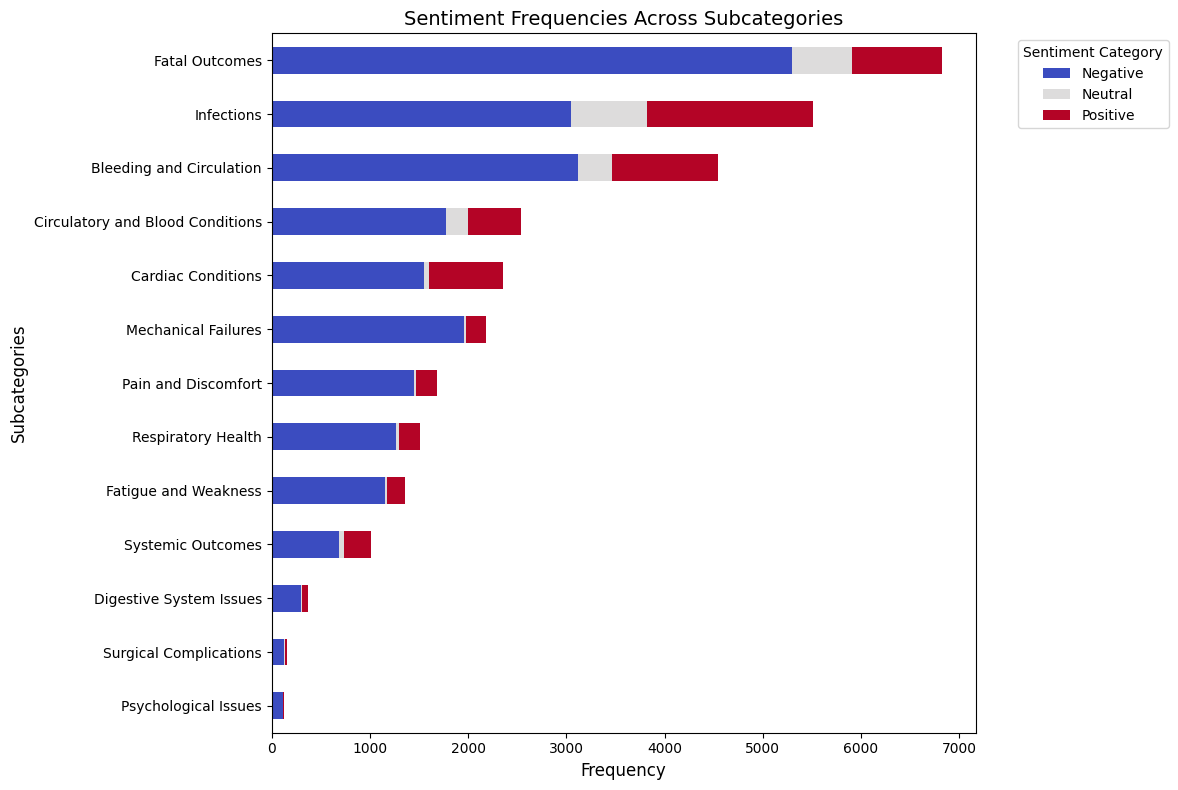

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import re

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure FOI_TEXT is a string and handle NaN values
adverseEvents['FOI_TEXT'] = adverseEvents['FOI_TEXT'].fillna('')

# Initialize a list to store sentiment results
sentiment_results = []

# Perform sentiment analysis for each subcategory
for subcategory_name, keywords in subcategories.items():
    # Create a regex pattern for the current subcategory
    subcategory_pattern = r'\b(' + '|'.join([re.escape(keyword) for keyword in keywords]) + r')\b'
    
    # Filter the documents mentioning the subcategory
    relevant_docs = adverseEvents[adverseEvents['FOI_TEXT'].str.contains(subcategory_pattern, case=False, na=False)]
    
    # Perform sentiment analysis using VADER
    for _, row in relevant_docs.iterrows():
        sentiment_scores = analyzer.polarity_scores(row['FOI_TEXT'])
        
        # Categorize sentiment based on the compound score
        if sentiment_scores['compound'] >= 0.05:
            sentiment_category = 'Positive'
        elif sentiment_scores['compound'] <= -0.05:
            sentiment_category = 'Negative'
        else:
            sentiment_category = 'Neutral'
        
        sentiment_results.append({
            'Subcategory': subcategory_name,
            'Sentiment_Category': sentiment_category
        })

# Convert sentiment results into a DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Calculate the frequency of each sentiment category per subcategory
sentiment_freq = sentiment_df.groupby(['Subcategory', 'Sentiment_Category']).size().reset_index(name='Count')

# Pivot the data for stacked bar chart
sentiment_pivot = sentiment_freq.pivot(index='Subcategory', columns='Sentiment_Category', values='Count').fillna(0)

# Sort subcategories by total counts in descending order
sentiment_pivot['Total'] = sentiment_pivot.sum(axis=1)
sorted_sentiment_pivot = sentiment_pivot.sort_values(by='Total', ascending=True).drop(columns=['Total'])

# Plot the horizontal stacked bar chart
sorted_sentiment_pivot.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Sentiment Frequencies Across Subcategories', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Subcategories', fontsize=12)
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


### Organizing figures (6-topic model LDA)

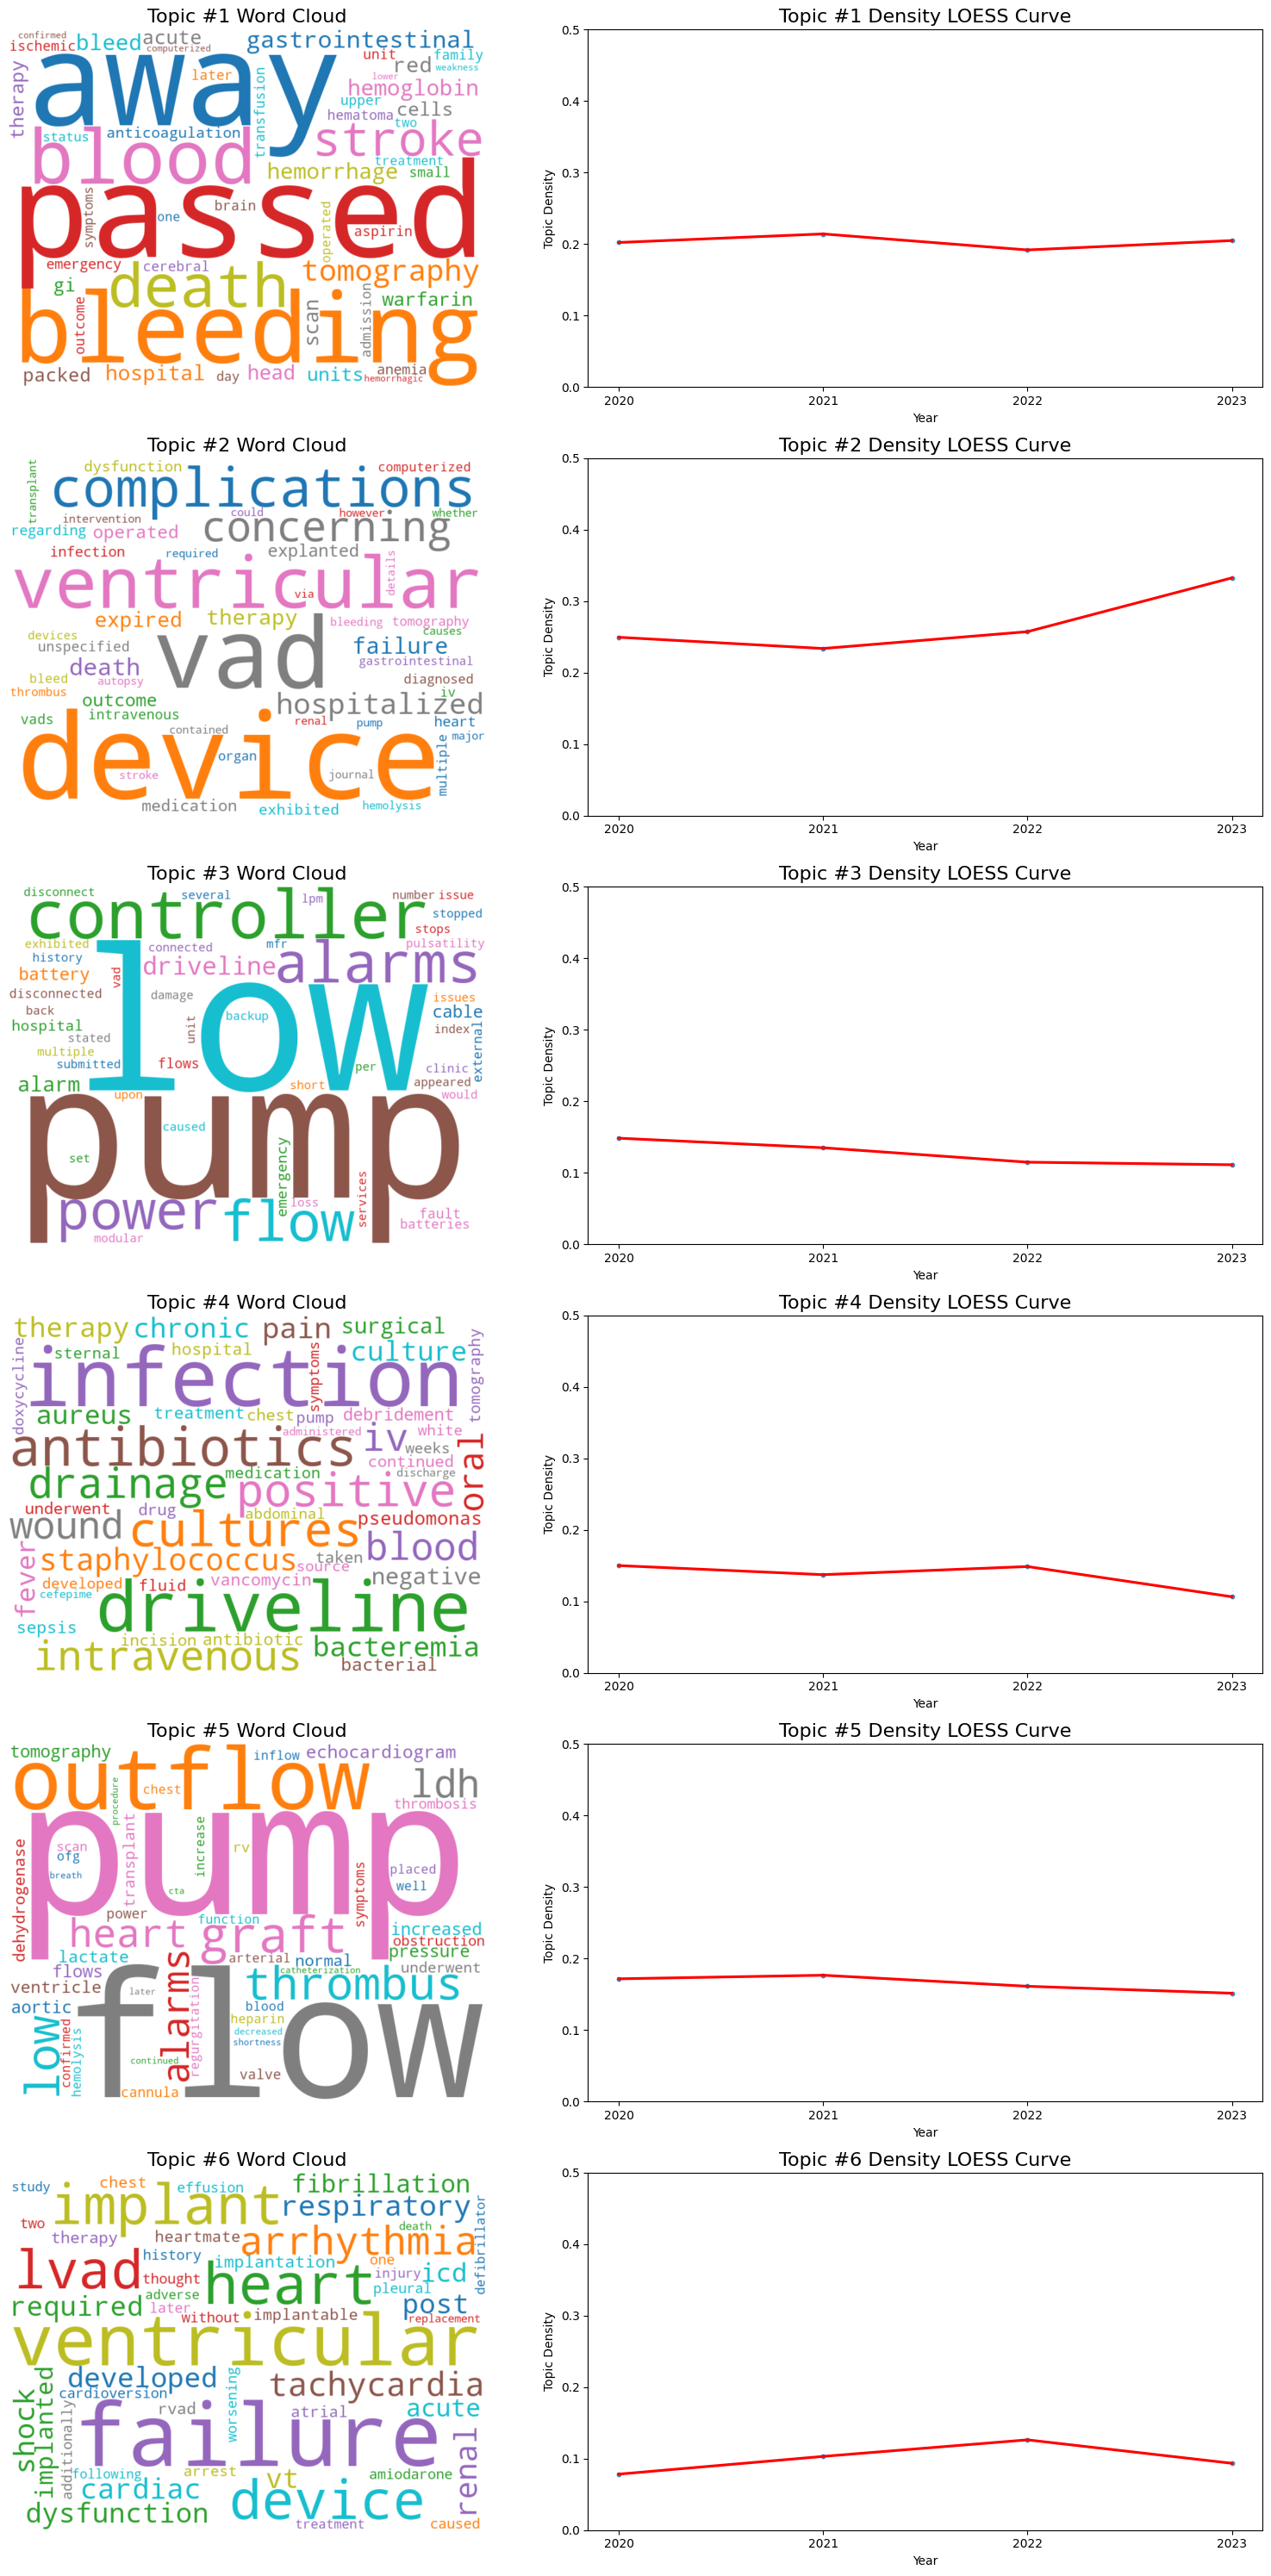

In [29]:
import matplotlib.gridspec as gridspec

# Set up the plotting space: one row per topic, 2 columns (word cloud and LOESS curve)
fig = plt.figure(figsize=(16, 30))  # Adjust figure size as needed
gs = gridspec.GridSpec(num_topics, 2, width_ratios=[1, 1])  # Create a grid layout

# Loop through each topic to generate both plots
for topic_idx in range(1, num_topics + 1):
    # --- Word Cloud ---
    # Get the words and their weights for the topic
    topic_terms = lda_model.get_topic_terms(topic_idx - 1, topn=50)  # Use topic_idx - 1 for LDA input
    word_freq = {dictionary[word_id]: weight for word_id, weight in topic_terms}

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=50,
        colormap='tab10'
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud in the left column
    ax_wordcloud = fig.add_subplot(gs[topic_idx - 1, 0])
    ax_wordcloud.imshow(wordcloud, interpolation='bilinear')
    ax_wordcloud.axis('off')
    ax_wordcloud.set_title(f'Topic #{topic_idx} Word Cloud', fontsize=16)

    # --- LOESS Curve ---
    # Subset data for this specific topic
    topic_data = topic_year_counts[topic_year_counts['Topic'] == topic_idx]

    # Plot the LOESS curve in the right column
    ax_loess = fig.add_subplot(gs[topic_idx - 1, 1])
    sns.regplot(
        data=topic_data,
        x='Year',
        y='Density',  # Plot density instead of raw counts
        lowess=True,
        scatter_kws={'s': 10},  # Scatter point size
        line_kws={'color': 'red'},  # Color of the LOESS line
        ci=95,  # Confidence interval of 95%
        ax=ax_loess
    )
    ax_loess.set_xlabel('Year')
    ax_loess.set_ylabel('Topic Density')
    ax_loess.set_title(f'Topic #{topic_idx} Density LOESS Curve', fontsize=16)
    ax_loess.set_ylim(0, 0.5)  # Set y-axis limit
    ax_loess.set_xticks([2020, 2021, 2022, 2023])  # Show only whole years

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
